## SPY Sentiment Signal Analysis

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

In [3]:
#Import Signal
df = pd.read_excel('signals.xlsx')
df.columns

Index(['date', 'SIGNAL'], dtype='object')

In [4]:
#Import QQQ
import yfinance as yf
import pandas as pd

ticker = "QQQ"
start_date = "2010-01-06"
end_date = "2025-08-27"

qqq = yf.download(ticker, start=start_date, end=end_date)


qqq.reset_index(inplace=True)
qqq.rename(columns={"Date": "date"}, inplace=True)
print(qqq.head())
print(qqq.tail())


C:\Users\Yi\AppData\Local\Temp\ipykernel_35128\1147624330.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  qqq = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price        date      Close       High        Low       Open     Volume
Ticker                   QQQ        QQQ        QQQ        QQQ        QQQ
0      2010-01-06  40.196457  40.553642  40.135474  40.422967   96033000
1      2010-01-07  40.222595  40.309716  40.004799  40.257443   77094100
2      2010-01-08  40.553650  40.553650  40.013516  40.135482   88886600
3      2010-01-11  40.388119  40.632049  40.179033  40.605915  104673400
4      2010-01-12  39.882832  40.196459  39.665035  40.144190   90673900
Price        date       Close        High         Low        Open    Volume
Ticker                    QQQ         QQQ         QQQ         QQQ       QQQ
3929   2025-08-20  565.900024  568.450012  558.840027  568.330017  76781100
3930   2025-08-21  563.280029  566.489990  560.979980  564.349976  46436900
3931   2025-08-22  571.969971  573.989990  563.270020  564.669983  51502100
3932   2025-08-25  570.320007  573.289978  569.159973  570.400024  34044700
3933   2025-08-26  572.609985  57

In [6]:
qqq = qqq.copy()
qqq.columns = [col[0] if col[0] != 'date' else 'date' for col in qqq.columns]

# 结果列会变成：['date', 'Close', 'High', 'Low', 'Open', 'Volume']
print("Flattened qqq columns:", qqq.columns)

# ========== Step 2. 确保 'date' 类型一致 ==========
qqq['date'] = pd.to_datetime(qqq['date']).dt.tz_localize(None)
df['date'] = pd.to_datetime(df['date']).dt.tz_localize(None)

# ========== Step 3. 合并 ==========
merged_df = pd.merge(qqq, df[['date', 'SIGNAL']], on='date', how='left')

# 如果你希望没有信号的日期填充为 0
merged_df['SIGNAL'] = merged_df['SIGNAL'].fillna(0)

print(merged_df.head())

Flattened qqq columns: Index(['date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
        date      Close       High        Low       Open     Volume  SIGNAL
0 2010-01-06  40.196457  40.553642  40.135474  40.422967   96033000   -2.12
1 2010-01-07  40.222595  40.309716  40.004799  40.257443   77094100   -1.22
2 2010-01-08  40.553650  40.553650  40.013516  40.135482   88886600    1.82
3 2010-01-11  40.388119  40.632049  40.179033  40.605915  104673400    0.12
4 2010-01-12  39.882832  40.196459  39.665035  40.144190   90673900   -2.36


In [7]:
merged_df

date       Close        High         Low        Open     Volume  \
0    2010-01-06   40.196457   40.553642   40.135474   40.422967   96033000   
1    2010-01-07   40.222595   40.309716   40.004799   40.257443   77094100   
2    2010-01-08   40.553650   40.553650   40.013516   40.135482   88886600   
3    2010-01-11   40.388119   40.632049   40.179033   40.605915  104673400   
4    2010-01-12   39.882832   40.196459   39.665035   40.144190   90673900   
...         ...         ...         ...         ...         ...        ...   
3929 2025-08-20  565.900024  568.450012  558.840027  568.330017   76781100   
3930 2025-08-21  563.280029  566.489990  560.979980  564.349976   46436900   
3931 2025-08-22  571.969971  573.989990  563.270020  564.669983   51502100   
3932 2025-08-25  570.320007  573.289978  569.159973  570.400024   34044700   
3933 2025-08-26  572.609985  572.919983  568.799988  569.830017   34103000   

        SIGNAL  
0    -2.120000  
1    -1.220000  
2     1.820000  
3     0.120000  
4    -2.360000  
...        ...  
3929  0.069370  
3930  0.000000  
3931  0.515511  
3932  0.365166  
3933  0.516359  

[3934 rows x 7 columns]

In [9]:
import pandas as pd

# 假设 merged_df 已经合并完成，包含 'date', 'Close', 'SIGNAL' 等列

# Step 1. 基于 SIGNAL 生成买入/卖出信号
# 规则：
# SIGNAL < -2  → 'BUY'
# SIGNAL >  2  → 'SELL'
# 否则        → 'HOLD'
merged_df['TRADE_SIGNAL'] = merged_df['SIGNAL'].apply(
    lambda x: 'BUY' if x < -2 else ('SELL' if x > 2 else 'HOLD')
)

# 如果你只想保留买入和卖出，不要 HOLD，可以这样做：
# merged_df['TRADE_SIGNAL'] = merged_df['SIGNAL'].apply(
#     lambda x: 'BUY' if x < -2 else ('SELL' if x > 2 else None)
# )

# Step 2. 可选：也可以做成数值化标记，方便回测或量化处理
# BUY = 1, SELL = -1, HOLD = 0
merged_df['TRADE_SIGNAL_NUM'] = merged_df['SIGNAL'].apply(
    lambda x: 1 if x < -2 else (-1 if x > 2 else 0)
)

# Step 3. 查看结果
print(merged_df[['date', 'SIGNAL', 'TRADE_SIGNAL', 'TRADE_SIGNAL_NUM']].head(10))


        date  SIGNAL TRADE_SIGNAL  TRADE_SIGNAL_NUM
0 2010-01-06   -2.12          BUY                 1
1 2010-01-07   -1.22         HOLD                 0
2 2010-01-08    1.82         HOLD                 0
3 2010-01-11    0.12         HOLD                 0
4 2010-01-12   -2.36          BUY                 1
5 2010-01-13    0.66         HOLD                 0
6 2010-01-14    0.72         HOLD                 0
7 2010-01-15   -1.53         HOLD                 0
8 2010-01-19    1.75         HOLD                 0
9 2010-01-20   -0.93         HOLD                 0


In [12]:
import pandas as pd

# 假设 merged_df 已经有 'date' 和 'Close' 列
# 目标：计算 EMA20 并添加到 DataFrame

# Step 1. 计算 EMA20
merged_df['EMA20'] = merged_df['Close'].ewm(span=20, adjust=False).mean()

# Step 2. 查看结果
print(merged_df[['date', 'Close', 'EMA20']].head(25))



         date      Close      EMA20
0  2010-01-06  40.196457  40.196457
1  2010-01-07  40.222595  40.198946
2  2010-01-08  40.553650  40.232728
3  2010-01-11  40.388119  40.247527
4  2010-01-12  39.882832  40.212794
5  2010-01-13  40.379414  40.228662
6  2010-01-14  40.414268  40.246339
7  2010-01-15  39.943821  40.217528
8  2010-01-19  40.588505  40.252859
9  2010-01-20  40.004799  40.229234
10 2010-01-21  39.630203  40.172184
11 2010-01-22  38.471519  40.010216
12 2010-01-25  38.602180  39.876117
13 2010-01-26  38.637043  39.758110
14 2010-01-27  38.941940  39.680380
15 2010-01-28  37.940090  39.514638
16 2010-01-29  37.277992  39.301624
17 2010-02-01  37.687462  39.147894
18 2010-02-02  38.027218  39.041163
19 2010-02-03  38.236290  38.964509
20 2010-02-04  37.129875  38.789782
21 2010-02-05  37.443520  38.661566
22 2010-02-08  37.173443  38.519840
23 2010-02-09  37.556786  38.428121
24 2010-02-10  37.478363  38.337667


In [13]:
merged_df

date       Close        High         Low        Open     Volume  \
0    2010-01-06   40.196457   40.553642   40.135474   40.422967   96033000   
1    2010-01-07   40.222595   40.309716   40.004799   40.257443   77094100   
2    2010-01-08   40.553650   40.553650   40.013516   40.135482   88886600   
3    2010-01-11   40.388119   40.632049   40.179033   40.605915  104673400   
4    2010-01-12   39.882832   40.196459   39.665035   40.144190   90673900   
...         ...         ...         ...         ...         ...        ...   
3929 2025-08-20  565.900024  568.450012  558.840027  568.330017   76781100   
3930 2025-08-21  563.280029  566.489990  560.979980  564.349976   46436900   
3931 2025-08-22  571.969971  573.989990  563.270020  564.669983   51502100   
3932 2025-08-25  570.320007  573.289978  569.159973  570.400024   34044700   
3933 2025-08-26  572.609985  572.919983  568.799988  569.830017   34103000   

        SIGNAL TRADE_SIGNAL  TRADE_SIGNAL_NUM       EMA20  
0    -2.120000          BUY                 1   40.196457  
1    -1.220000         HOLD                 0   40.198946  
2     1.820000         HOLD                 0   40.232728  
3     0.120000         HOLD                 0   40.247527  
4    -2.360000          BUY                 1   40.212794  
...        ...          ...               ...         ...  
3929  0.069370         HOLD                 0  569.067353  
3930  0.000000         HOLD                 0  568.516179  
3931  0.515511         HOLD                 0  568.845112  
3932  0.365166         HOLD                 0  568.985578  
3933  0.516359         HOLD                 0  569.330759  

[3934 rows x 10 columns]

共触发 475 笔独立交易（每笔名义 10000 USD）。
每笔交易平均 Return: -0.000785 (-0.08%)
    side entry_date   entry_px  exit_date    exit_px       ret     pnl_usd
0   LONG 2010-01-12  39.882832 2010-01-13  40.379414  0.012451  124.510224
1   LONG 2010-01-22  38.471519 2010-02-16  38.610905  0.003623   36.230756
2  SHORT 2010-02-16  38.610905 2010-02-23  38.471519  0.003610   36.099963
3  SHORT 2010-02-17  38.828686 2010-02-23  38.471519  0.009199   91.985161
4  SHORT 2010-02-18  39.072628 2010-02-23  38.471519  0.015384  153.843901


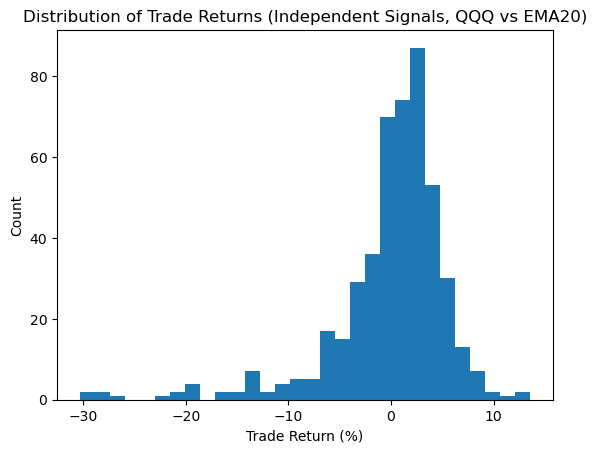

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = merged_df.copy().sort_values('date').reset_index(drop=True)

# 若只有连续 SIGNAL（< -2 买、> 2 卖），取消注释自动生成信号列
# df['TRADE_SIGNAL_NUM'] = np.where(df['SIGNAL'] < -2, 1, np.where(df['SIGNAL'] > 2, -1, 0))

# 统一信号来源
if 'TRADE_SIGNAL_NUM' in df.columns:
    sig_num = df['TRADE_SIGNAL_NUM']
elif 'TRADE_SIGNAL' in df.columns:
    sig_num = df['TRADE_SIGNAL'].map({'BUY':1, 'SELL':-1}).fillna(0)
else:
    raise ValueError("需要 TRADE_SIGNAL_NUM / TRADE_SIGNAL / SIGNAL（三者之一）")

# 入场条件（注意必须满足与 EMA20 的相对位置）
buy_entries_idx  = df.index[(sig_num == 1) & (df['Close'] < df['EMA20'])].to_list()
sell_entries_idx = df.index[(sig_num == -1) & (df['Close'] > df['EMA20'])].to_list()

def find_exit_idx(start_idx: int, side: int) -> int:
    """
    寻找平仓点（独立于其他交易）：
      side=+1 多头：首次出现从 Close<EMA 到 Close>=EMA 的上穿
      side=-1 空头：首次出现从 Close>EMA 到 Close<=EMA 的下穿
    若未找到，返回最后一根索引
    """
    for i in range(start_idx + 1, len(df)):
        c, e = df.loc[i, 'Close'], df.loc[i, 'EMA20']
        c_prev, e_prev = df.loc[i-1, 'Close'], df.loc[i-1, 'EMA20']
        if side == 1:
            if (c_prev < e_prev) and (c >= e):
                return i
        else:
            if (c_prev > e_prev) and (c <= e):
                return i
    return len(df) - 1

ENTRY_NOTIONAL = 10_000.0
trades = []

# 为每一个入场索引各自独立生成一笔交易（允许叠加）
for idx in buy_entries_idx:
    entry_px = float(df.loc[idx, 'Close'])
    exit_idx = find_exit_idx(idx, side=+1)
    exit_px  = float(df.loc[exit_idx, 'Close'])
    ret = (exit_px - entry_px) / entry_px
    trades.append({
        'side': 'LONG',
        'entry_date': df.loc[idx, 'date'],
        'entry_px': entry_px,
        'exit_date': df.loc[exit_idx, 'date'],
        'exit_px': exit_px,
        'ret': ret,
        'pnl_usd': ret * ENTRY_NOTIONAL
    })

for idx in sell_entries_idx:
    entry_px = float(df.loc[idx, 'Close'])
    exit_idx = find_exit_idx(idx, side=-1)
    exit_px  = float(df.loc[exit_idx, 'Close'])
    ret = (entry_px - exit_px) / entry_px  # 空头收益率
    trades.append({
        'side': 'SHORT',
        'entry_date': df.loc[idx, 'date'],
        'entry_px': entry_px,
        'exit_date': df.loc[exit_idx, 'date'],
        'exit_px': exit_px,
        'ret': ret,
        'pnl_usd': ret * ENTRY_NOTIONAL
    })

trades_df = pd.DataFrame(trades).sort_values(['entry_date', 'side']).reset_index(drop=True)

avg_ret = np.nan if trades_df.empty else trades_df['ret'].mean()
print(f"共触发 {len(trades_df)} 笔独立交易（每笔名义 {ENTRY_NOTIONAL:.0f} USD）。")
print(f"每笔交易平均 Return: {avg_ret:.6f} ({avg_ret*100:.2f}%)")
print(trades_df.head())

# 直方图（以百分比显示）
plt.figure()
plt.hist(trades_df['ret'] * 100, bins=30)
plt.xlabel('Trade Return (%)')
plt.ylabel('Count')
plt.title('Distribution of Trade Returns (Independent Signals, QQQ vs EMA20)')
plt.show()


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========== 可选：如果本机已有 merged_df（含 date, Close, EMA20, 以及 SIGNAL 或 TRADE_SIGNAL(_NUM)），将直接使用 ==========
# 若没有 merged_df，会自动下载 QQQ(2010-01-06 ~ 2025-08-27) 并构造一个示例 merged_df。
def ensure_merged_df():
    global merged_df
    try:
        assert isinstance(merged_df, pd.DataFrame)
        needed = {'date','Close'}
        assert needed.issubset(set(merged_df.columns))
        return merged_df.copy()
    except Exception:
        import yfinance as yf
        start_date = "2010-01-06"
        end_date   = "2025-08-27"
        px = yf.download("QQQ", start=start_date, end=end_date)
        px = px.rename_axis('date').reset_index()
        px['EMA20'] = px['Close'].ewm(span=20, adjust=False).mean()

        # 构造示例 SIGNAL（你本地已有 SIGNAL/TRADE_SIGNAL 列时，这段不会用到）
        rng = np.random.default_rng(0)
        raw = rng.normal(0, 1, size=len(px))
        raw[(np.arange(len(px)) % 37) == 0] = -3.0  # 强制 BUY
        raw[(np.arange(len(px)) % 61) == 0] =  3.2  # 强制 SELL
        px['SIGNAL'] = raw

        return px

df = ensure_merged_df().copy()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

# ========== 标准化信号 ==========
if 'TRADE_SIGNAL_NUM' in df.columns:
    sig_num = df['TRADE_SIGNAL_NUM']
elif 'TRADE_SIGNAL' in df.columns:
    sig_num = df['TRADE_SIGNAL'].map({'BUY':1, 'SELL':-1}).fillna(0)
elif 'SIGNAL' in df.columns:
    # 你的规则：< -2 BUY，> 2 SELL
    sig_num = np.where(df['SIGNAL'] < -2, 1, np.where(df['SIGNAL'] > 2, -1, 0))
else:
    raise ValueError("缺少信号列：需要 TRADE_SIGNAL_NUM 或 TRADE_SIGNAL 或 SIGNAL")

# 确保有 EMA20（若你已算好，会直接使用）
if 'EMA20' not in df.columns:
    df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()

# ========== 入场条件（允许持仓期间再入）==========
buy_entries_idx  = df.index[(sig_num == 1) & (df['Close'] < df['EMA20'])].to_list()
sell_entries_idx = df.index[(sig_num == -1) & (df['Close'] > df['EMA20'])].to_list()

def find_exit_idx(start_idx: int, side: int) -> int:
    """
    独立交易的平仓点（严格“穿越”）：
      side=+1：等待 Close 从下方穿越到(>=) EMA20；
      side=-1：等待 Close 从上方穿越到(<=) EMA20。
    找不到则在最后一根K线平。
    """
    for i in range(start_idx + 1, len(df)):
        c_prev, e_prev = float(df.loc[i-1, "Close"]), float(df.loc[i-1, "EMA20"])
        c, e = float(df.loc[i, "Close"]), float(df.loc[i, "EMA20"])
        if side == 1:
            if (c_prev < e_prev) and (c >= e):
                return i
        else:
            if (c_prev > e_prev) and (c <= e):
                return i
    return len(df) - 1

def compute_trade_metrics(entry_idx: int, exit_idx: int, side: int, notional: float = 10_000.0) -> dict:
    entry_px = float(df.loc[entry_idx, "Close"])
    exit_px  = float(df.loc[exit_idx,  "Close"])
    entry_date = pd.to_datetime(df.loc[entry_idx, "date"])
    exit_date  = pd.to_datetime(df.loc[exit_idx,  "date"])
    bars_held = int(exit_idx - entry_idx)
    cal_days  = int((exit_date - entry_date).days)

    if side == 1:  # 多头收益
        ret = (exit_px - entry_px) / entry_px
        path = (df.loc[entry_idx:exit_idx, "Close"].astype(float) / entry_px) - 1.0
    else:          # 空头收益（按入场价规范化）
        ret = (entry_px - exit_px) / entry_px
        path = (entry_px / df.loc[entry_idx:exit_idx, "Close"].astype(float)) - 1.0

    mae = float(path.min()) if len(path) else np.nan  # 最大不利变动(最小值)：即每笔交易的 drawdown
    mfe = float(path.max()) if len(path) else np.nan  # 可选：最大有利变动
    ann_ret = np.nan
    if bars_held > 0 and np.isfinite(ret):
        ann_ret = (1.0 + ret) ** (252.0 / bars_held) - 1.0

    return {
        "side": "LONG" if side == 1 else "SHORT",
        "entry_date": entry_date,
        "exit_date": exit_date,
        "bars_held": bars_held,          # 交易日持有数
        "calendar_days": cal_days,       # 自然日
        "entry_px": entry_px,
        "exit_px": exit_px,
        "return": ret,                   # 每笔收益率
        "annualized_return": ann_ret,    # 年化收益
        "drawdown_MAE": mae,             # 每笔交易的最大回撤(路径最不利)
        "favorable_MFE": mfe,            # 可选输出
        "pnl_usd": ret * notional,
    }

# ========== 生成独立交易记录 ==========
NOTIONAL = 10_000.0
trades = []
for idx in buy_entries_idx:
    exit_idx = find_exit_idx(idx, side=+1)
    trades.append(compute_trade_metrics(idx, exit_idx, side=+1, notional=NOTIONAL))
for idx in sell_entries_idx:
    exit_idx = find_exit_idx(idx, side=-1)
    trades.append(compute_trade_metrics(idx, exit_idx, side=-1, notional=NOTIONAL))

trades_df = pd.DataFrame(trades).sort_values(["entry_date","side"]).reset_index(drop=True)

# 概览与统计
avg_ret = trades_df['return'].mean() if not trades_df.empty else np.nan
print(f"共 {len(trades_df)} 笔交易；每笔名义 ${NOTIONAL:,.0f}")
print(f"每笔交易平均 Return: {avg_ret:.6f}  ({avg_ret*100:.2f}%)")
trades_df.head(10)


共 475 笔交易；每笔名义 $10,000
每笔交易平均 Return: -0.000785  (-0.08%)


side entry_date  exit_date  bars_held  calendar_days   entry_px  \
0   LONG 2010-01-12 2010-01-13          1              1  39.882832   
1   LONG 2010-01-22 2010-02-16         16             25  38.471519   
2  SHORT 2010-02-16 2010-02-23          5              7  38.610905   
3  SHORT 2010-02-17 2010-02-23          4              6  38.828686   
4  SHORT 2010-02-18 2010-02-23          3              5  39.072628   
5  SHORT 2010-03-05 2010-04-30         39             56  40.457809   
6  SHORT 2010-03-08 2010-04-30         38             53  40.536232   
7  SHORT 2010-03-09 2010-04-30         37             52  40.762741   
8  SHORT 2010-03-10 2010-04-30         36             51  41.093784   
9  SHORT 2010-04-14 2010-04-30         12             16  43.527252   

     exit_px    return  annualized_return  drawdown_MAE  favorable_MFE  \
0  40.379414  0.012451          21.607569      0.000000       0.012451   
1  38.610905  0.003623           0.058614     -0.034874       0.012228   
2  38.471519  0.003610           0.199154     -0.011817       0.003623   
3  38.471519  0.009199           0.780435     -0.006243       0.009284   
4  38.471519  0.015384           2.605459      0.000000       0.015625   
5  42.942932 -0.061425          -0.336093     -0.081740       0.000000   
6  42.942932 -0.059372          -0.333623     -0.079960       0.000000   
7  42.942932 -0.053485          -0.312284     -0.074819       0.000000   
8  42.942932 -0.044998          -0.275515     -0.067306       0.000000   
9  42.942932  0.013424           0.323174     -0.012074       0.013607   

      pnl_usd  
0  124.510224  
1   36.230756  
2   36.099963  
3   91.985161  
4  153.843901  
5 -614.250429  
6 -593.715798  
7 -534.848978  
8 -449.982358  
9  134.242351

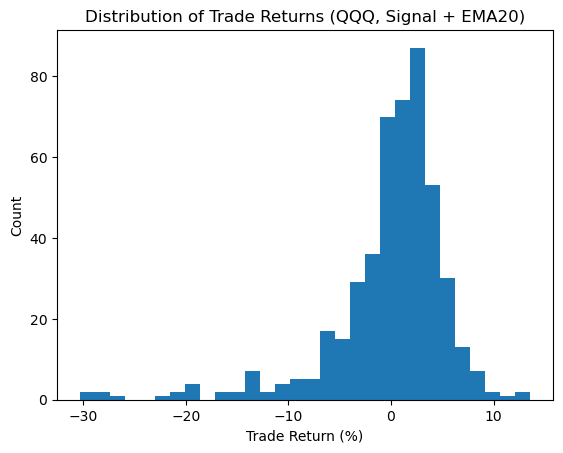

In [24]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(trades_df['return'] * 100, bins=30)  # 百分比
plt.xlabel('Trade Return (%)')
plt.ylabel('Count')
plt.title('Distribution of Trade Returns (QQQ, Signal + EMA20)')
plt.show()


In [27]:
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)  # 只需运行一次

# 在任意单元格里显示可交互表（支持排序、搜索、分页、导出等）
show(trades_df, dom='Bfrtip', buttons=["copy", "csv", "excel"], paging=True, scrollX=True)


c:\Users\Yi\anaconda3\Lib\site-packages\itables\typing.py:203: SyntaxWarning: These arguments are not documented in ITableOptions: {'dom'}. You can silence this warning by setting `itables.options.warn_on_undocumented_option=False`. If you believe ITableOptions should be updated, please make a PR or open an issue at https://github.com/mwouts/itables
  warnings.warn(
c:\Users\Yi\anaconda3\Lib\site-packages\itables\typing.py:203: SyntaxWarning: These arguments are not documented in DTForITablesOptions: {'dom'}. You can silence this warning by setting `itables.options.warn_on_undocumented_option=False`. If you believe ITableOptions should be updated, please make a PR or open an issue at https://github.com/mwouts/itables
  warnings.warn(


In [34]:
trades_df[trades_df['side'] == 'LONG']['return'].mean()

0.040404921600861586

In [32]:
trades_df.columns

Index(['side', 'entry_date', 'exit_date', 'bars_held', 'calendar_days',
       'entry_px', 'exit_px', 'return', 'annualized_return', 'drawdown_MAE',
       'favorable_MFE', 'pnl_usd'],
      dtype='object')

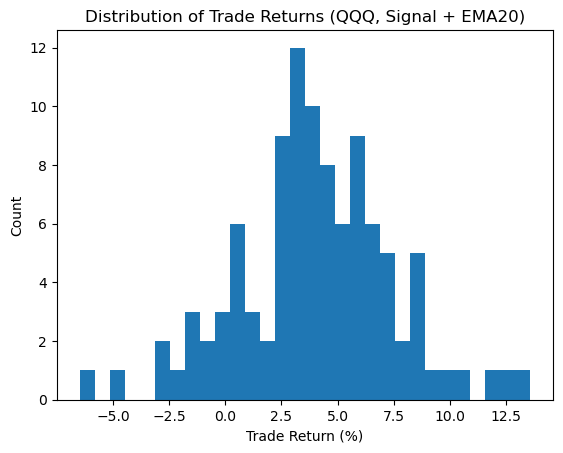

In [37]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(trades_df[trades_df['side'] == 'LONG']['return'] * 100, bins=30)  # 百分比
plt.xlabel('Trade Return (%)')
plt.ylabel('Count')
plt.title('Distribution of Trade Returns (QQQ, Signal + EMA20)')
plt.show()


总盈利交易数: 297
多头盈利交易数: 90
空头盈利交易数: 207


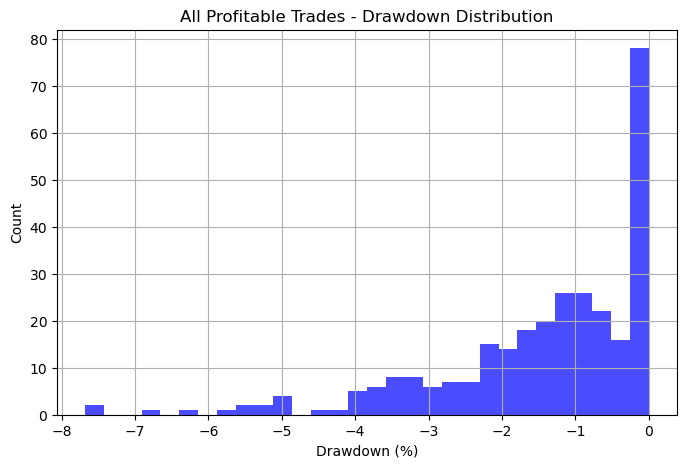

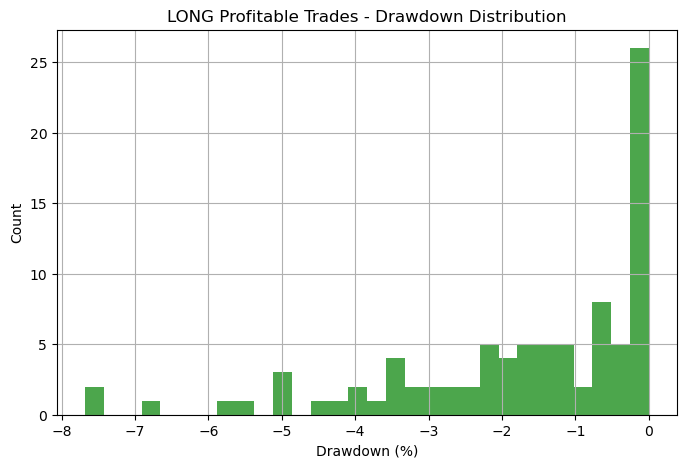

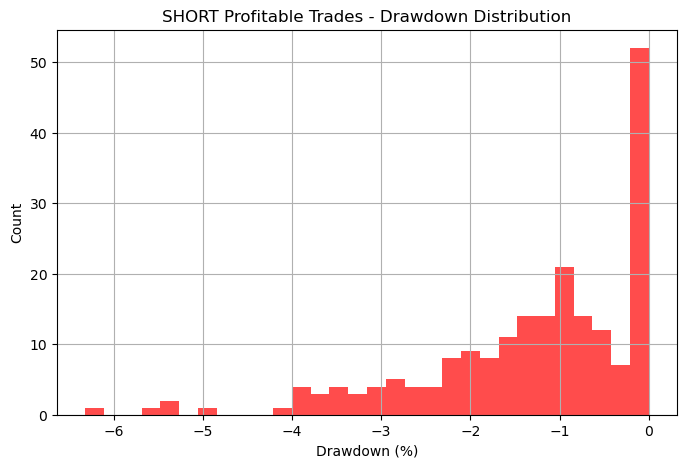

In [39]:
import matplotlib.pyplot as plt

# 1. 过滤盈利交易
profitable_trades = trades_df[trades_df['return'] > 0]

# 分别筛选多头和空头
profitable_long = profitable_trades[profitable_trades['side'] == 'LONG']
profitable_short = profitable_trades[profitable_trades['side'] == 'SHORT']

print(f"总盈利交易数: {len(profitable_trades)}")
print(f"多头盈利交易数: {len(profitable_long)}")
print(f"空头盈利交易数: {len(profitable_short)}")

# ========== 2. 绘制三个独立的直方图 ==========

# --- 所有盈利交易 ---
plt.figure(figsize=(8, 5))
plt.hist(profitable_trades['drawdown_MAE'] * 100, bins=30, color='blue', alpha=0.7)
plt.xlabel('Drawdown (%)')
plt.ylabel('Count')
plt.title('All Profitable Trades - Drawdown Distribution')
plt.grid(True)
plt.show()

# --- 多头盈利交易 ---
plt.figure(figsize=(8, 5))
plt.hist(profitable_long['drawdown_MAE'] * 100, bins=30, color='green', alpha=0.7)
plt.xlabel('Drawdown (%)')
plt.ylabel('Count')
plt.title('LONG Profitable Trades - Drawdown Distribution')
plt.grid(True)
plt.show()

# --- 空头盈利交易 ---
plt.figure(figsize=(8, 5))
plt.hist(profitable_short['drawdown_MAE'] * 100, bins=30, color='red', alpha=0.7)
plt.xlabel('Drawdown (%)')
plt.ylabel('Count')
plt.title('SHORT Profitable Trades - Drawdown Distribution')
plt.grid(True)
plt.show()


总亏损交易数: 178
多头亏损交易数: 12
空头亏损交易数: 166


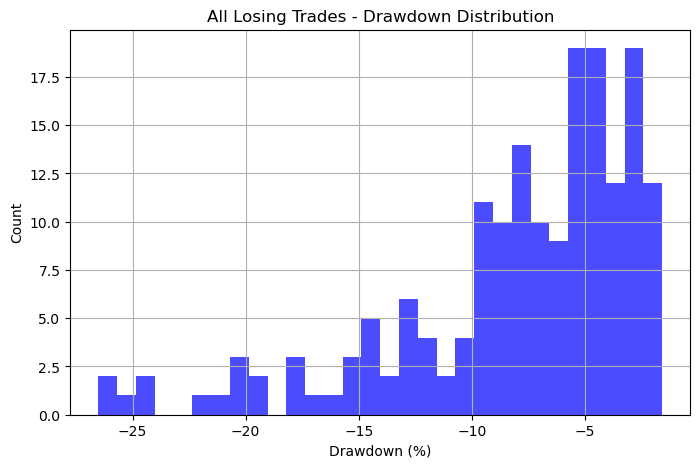

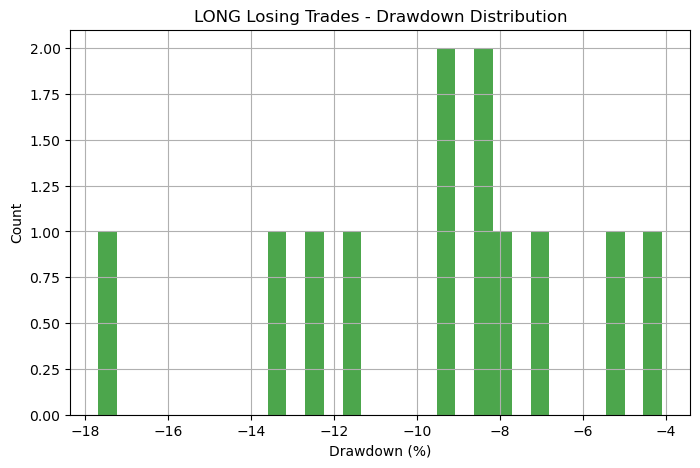

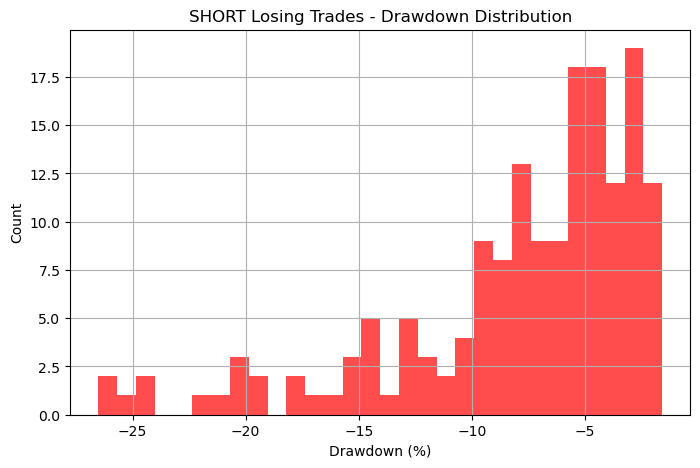

In [40]:
import matplotlib.pyplot as plt

# 1. 过滤亏损交易
loss_trades = trades_df[trades_df['return'] < 0]

# 分别筛选多头和空头
loss_long = loss_trades[loss_trades['side'] == 'LONG']
loss_short = loss_trades[loss_trades['side'] == 'SHORT']

print(f"总亏损交易数: {len(loss_trades)}")
print(f"多头亏损交易数: {len(loss_long)}")
print(f"空头亏损交易数: {len(loss_short)}")

# ========== 2. 绘制三个独立的直方图 ==========

# --- 所有亏损交易 ---
plt.figure(figsize=(8, 5))
plt.hist(loss_trades['drawdown_MAE'] * 100, bins=30, color='blue', alpha=0.7)
plt.xlabel('Drawdown (%)')
plt.ylabel('Count')
plt.title('All Losing Trades - Drawdown Distribution')
plt.grid(True)
plt.show()

# --- 多头亏损交易 ---
plt.figure(figsize=(8, 5))
plt.hist(loss_long['drawdown_MAE'] * 100, bins=30, color='green', alpha=0.7)
plt.xlabel('Drawdown (%)')
plt.ylabel('Count')
plt.title('LONG Losing Trades - Drawdown Distribution')
plt.grid(True)
plt.show()

# --- 空头亏损交易 ---
plt.figure(figsize=(8, 5))
plt.hist(loss_short['drawdown_MAE'] * 100, bins=30, color='red', alpha=0.7)
plt.xlabel('Drawdown (%)')
plt.ylabel('Count')
plt.title('SHORT Losing Trades - Drawdown Distribution')
plt.grid(True)
plt.show()


总交易数: 475；胜率: 60.21%
平均每笔收益: 0.001908  (0.19%)
    side entry_date  exit_date  bars_held  calendar_days   entry_px  \
0   LONG 2010-01-12 2010-01-13          1              1  39.882832   
1   LONG 2010-01-22 2010-02-16         16             25  38.471519   
2  SHORT 2010-02-16 2010-02-23          5              7  38.610905   
3  SHORT 2010-02-17 2010-02-23          4              6  38.828686   
4  SHORT 2010-02-18 2010-02-23          3              5  39.072628   
5  SHORT 2010-03-05 2010-04-06         21             32  40.457809   
6  SHORT 2010-03-08 2010-04-09         23             32  40.536232   
7  SHORT 2010-03-09 2010-04-13         24             35  40.762741   
8  SHORT 2010-03-10 2010-04-14         24             35  41.093784   
9  SHORT 2010-04-14 2010-04-30         12             16  43.527252   

     exit_px    return  annualized_return  drawdown_MAE  favorable_MFE  \
0  40.379414  0.012451          21.607569      0.000000       0.012451   
1  38.610905  0.003623 

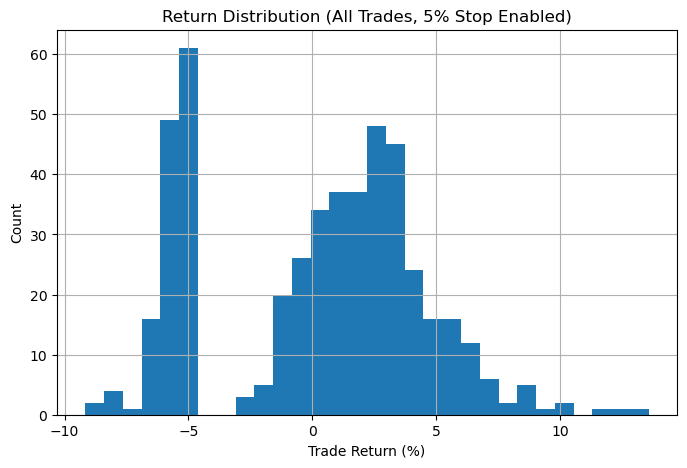

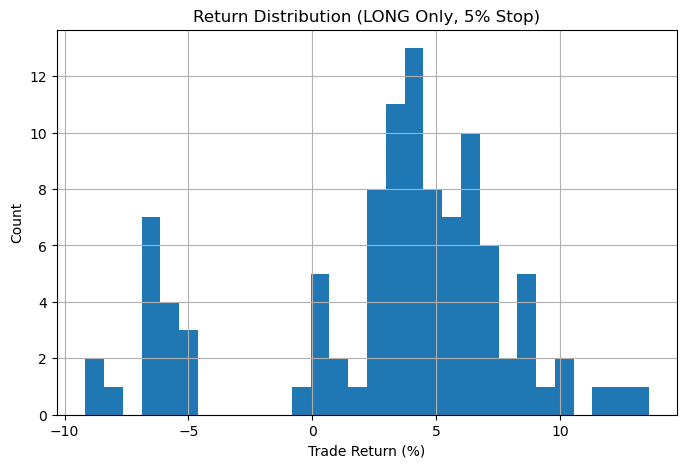

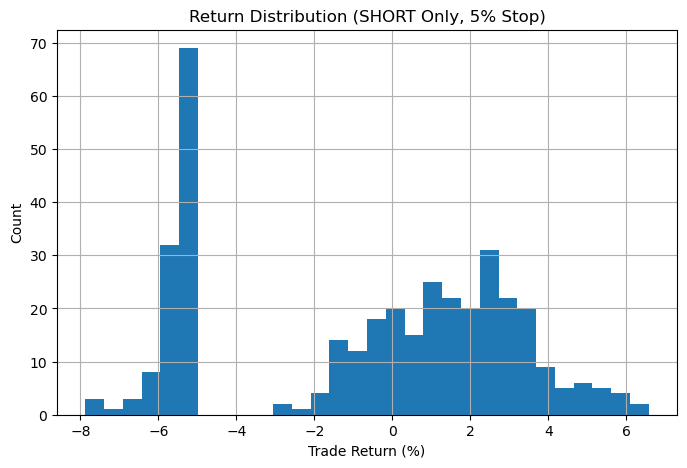

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========== 0) 准备数据 ==========
# 假设你已有 merged_df，包含至少：['date','Close','EMA20']，以及 SIGNAL 或 TRADE_SIGNAL(_NUM)
# 若没有，可取消下一段注释自动下载示例数据
# ----------------------------------------------------
# import yfinance as yf
# merged_df = yf.download("QQQ", start="2010-01-06", end="2025-08-27").rename_axis('date').reset_index()
# merged_df['EMA20'] = merged_df['Close'].ewm(span=20, adjust=False).mean()
# rng = np.random.default_rng(0)
# tmp = rng.normal(0,1,len(merged_df))
# tmp[(np.arange(len(merged_df)) % 37)==0] = -3.0  # 强制 BUY 信号
# tmp[(np.arange(len(merged_df)) % 61)==0] =  3.2  # 强制 SELL 信号
# merged_df['SIGNAL'] = tmp
# ----------------------------------------------------

df = merged_df.copy()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

# 若你只有连续 SIGNAL，按规则：< -2 为 BUY，> 2 为 SELL
if 'TRADE_SIGNAL_NUM' in df.columns:
    sig_num = df['TRADE_SIGNAL_NUM']
elif 'TRADE_SIGNAL' in df.columns:
    sig_num = df['TRADE_SIGNAL'].map({'BUY':1, 'SELL':-1}).fillna(0)
elif 'SIGNAL' in df.columns:
    sig_num = np.where(df['SIGNAL'] < -2, 1, np.where(df['SIGNAL'] > 2, -1, 0))
else:
    raise ValueError("缺少信号列：需要 TRADE_SIGNAL_NUM 或 TRADE_SIGNAL 或 SIGNAL")

if 'EMA20' not in df.columns:
    df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()

# ========== 1) 入场条件（信号独立，允许重叠）==========
buy_entries_idx  = df.index[(sig_num == 1) & (df['Close'] < df['EMA20'])].to_list()
sell_entries_idx = df.index[(sig_num == -1) & (df['Close'] > df['EMA20'])].to_list()

STOP_PCT = 0.05         # 5% 止损（以入场价为基准）
NOTIONAL = 10_000.0     # 每笔固定名义

def find_exit_with_stop(entry_idx: int, side: int):
    """
    返回 (exit_idx, reason)
      side = +1: 多头，等待向上穿越 EMA20 或触发 -5% 止损（收盘价）
      side = -1: 空头，等待向下穿越 EMA20 或触发 -5% 止损（收盘价）
    同根K线同时满足时，优先 'stop'，否则 'cross'。
    找不到穿越/止损则在最后一根平仓。
    """
    entry_px = float(df.loc[entry_idx, 'Close'])

    for i in range(entry_idx + 1, len(df)):
        c_prev, e_prev = float(df.loc[i-1, 'Close']), float(df.loc[i-1, 'EMA20'])
        c, e = float(df.loc[i, 'Close']), float(df.loc[i, 'EMA20'])

        # 1) 先判断止损（以收盘为准）
        if side == 1:
            hit_stop = (c <= entry_px * (1 - STOP_PCT))   # 多头：跌到/低于 -5%
        else:
            hit_stop = (c >= entry_px * (1 + STOP_PCT))   # 空头：涨到/高于 +5%

        if hit_stop:
            return i, 'stop'

        # 2) 再判断均线“穿越”
        if side == 1:
            crossed = (c_prev < e_prev) and (c >= e)      # 多头：下->上
        else:
            crossed = (c_prev > e_prev) and (c <= e)      # 空头：上->下

        if crossed:
            return i, 'cross'

    return len(df) - 1, 'last'  # 走到末尾还没触发

def per_trade_metrics(entry_idx: int, exit_idx: int, side: int, reason: str, notional: float = NOTIONAL) -> dict:
    entry_px = float(df.loc[entry_idx, 'Close'])
    exit_px  = float(df.loc[exit_idx,  'Close'])
    entry_date = pd.to_datetime(df.loc[entry_idx, 'date'])
    exit_date  = pd.to_datetime(df.loc[exit_idx,  'date'])
    bars_held = int(exit_idx - entry_idx)
    cal_days  = int((exit_date - entry_date).days)

    # 路径收益（用于 MAE/MFE）
    if side == 1:  # 多头
        ret = (exit_px - entry_px) / entry_px
        path = (df.loc[entry_idx:exit_idx, 'Close'].astype(float) / entry_px) - 1.0
    else:          # 空头
        ret = (entry_px - exit_px) / entry_px
        path = (entry_px / df.loc[entry_idx:exit_idx, 'Close'].astype(float)) - 1.0

    mae = float(path.min()) if len(path) else np.nan  # 最大不利点（负数）
    mfe = float(path.max()) if len(path) else np.nan  # 最大有利点
    ann_ret = np.nan
    if bars_held > 0 and np.isfinite(ret):
        ann_ret = (1.0 + ret) ** (252.0 / bars_held) - 1.0

    return {
        'side': 'LONG' if side == 1 else 'SHORT',
        'entry_date': entry_date,
        'exit_date': exit_date,
        'bars_held': bars_held,
        'calendar_days': cal_days,
        'entry_px': entry_px,
        'exit_px': exit_px,
        'return': ret,
        'annualized_return': ann_ret,
        'drawdown_MAE': mae,
        'favorable_MFE': mfe,
        'exit_reason': reason,          # 'stop' / 'cross' / 'last'
        'pnl_usd': ret * notional
    }

# ========== 2) 生成交易（允许重叠，每个信号独立带止损）==========
records = []

for idx in buy_entries_idx:
    exit_idx, reason = find_exit_with_stop(idx, side=+1)
    records.append(per_trade_metrics(idx, exit_idx, side=+1, reason=reason))

for idx in sell_entries_idx:
    exit_idx, reason = find_exit_with_stop(idx, side=-1)
    records.append(per_trade_metrics(idx, exit_idx, side=-1, reason=reason))

trades_df = pd.DataFrame(records).sort_values(['entry_date','side']).reset_index(drop=True)

# ========== 3) 概览统计 ==========
win_rate = (trades_df['return'] > 0).mean() if len(trades_df) else np.nan
print(f"总交易数: {len(trades_df)}；胜率: {win_rate*100:.2f}%")
print(f"平均每笔收益: {trades_df['return'].mean():.6f}  ({trades_df['return'].mean()*100:.2f}%)")
print(trades_df.head(10))

# ========== 4) 画“所有交易”的收益率分布（独立图）==========
plt.figure(figsize=(8,5))
plt.hist(trades_df['return'] * 100, bins=30)
plt.xlabel('Trade Return (%)')
plt.ylabel('Count')
plt.title('Return Distribution (All Trades, 5% Stop Enabled)')
plt.grid(True)
plt.show()

# ========== 5) （可选）分别画多头/空头收益率分布（各自独立图）==========
# 多头
plt.figure(figsize=(8,5))
plt.hist(trades_df.loc[trades_df['side']=='LONG','return'] * 100, bins=30)
plt.xlabel('Trade Return (%)')
plt.ylabel('Count')
plt.title('Return Distribution (LONG Only, 5% Stop)')
plt.grid(True)
plt.show()

# 空头
plt.figure(figsize=(8,5))
plt.hist(trades_df.loc[trades_df['side']=='SHORT','return'] * 100, bins=30)
plt.xlabel('Trade Return (%)')
plt.ylabel('Count')
plt.title('Return Distribution (SHORT Only, 5% Stop)')
plt.grid(True)
plt.show()


总交易数: 475
胜率: 62.11%
    side entry_date  exit_date  bars_held  calendar_days   entry_px  \
0   LONG 2010-01-12 2010-01-13          1              1  39.882832   
1   LONG 2010-01-22 2010-02-16         16             25  38.471519   
2  SHORT 2010-02-16 2010-02-23          5              7  38.610905   
3  SHORT 2010-02-17 2010-02-23          4              6  38.828686   
4  SHORT 2010-02-18 2010-02-23          3              5  39.072628   
5  SHORT 2010-03-05 2010-04-05         20             31  40.457809   
6  SHORT 2010-03-08 2010-04-06         20             29  40.536232   
7  SHORT 2010-03-09 2010-04-12         23             34  40.762741   
8  SHORT 2010-03-10 2010-04-16         26             37  41.093784   
9  SHORT 2010-04-14 2010-04-27          9             13  43.527252   

     exit_px     exit_reason    return  annualized_return  drawdown_MAE  \
0  40.228662  cross_intrabar  0.008671           7.808486     -0.005461   
1  38.322350  cross_intrabar -0.003877         

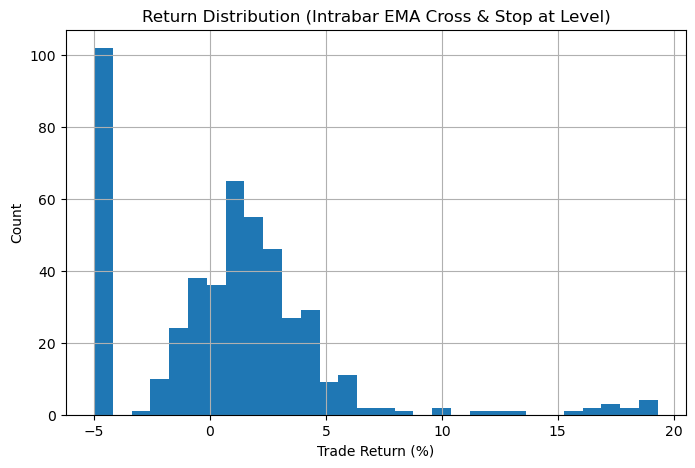

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 假设 merged_df 至少包含: ['date','Open','High','Low','Close','EMA20']，以及 SIGNAL 或 TRADE_SIGNAL(_NUM)
df = merged_df.copy()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

# 标准化信号： < -2 -> BUY(1), > 2 -> SELL(-1)
if 'TRADE_SIGNAL_NUM' in df.columns:
    sig_num = df['TRADE_SIGNAL_NUM']
elif 'TRADE_SIGNAL' in df.columns:
    sig_num = df['TRADE_SIGNAL'].map({'BUY':1, 'SELL':-1}).fillna(0)
else:
    sig_num = np.where(df['SIGNAL'] < -2, 1, np.where(df['SIGNAL'] > 2, -1, 0))

# 确保有 EMA20
if 'EMA20' not in df.columns:
    df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()

# 入场（信号独立，允许重叠）
buy_entries  = df.index[(sig_num == 1) & (df['Close'] < df['EMA20'])].to_list()
sell_entries = df.index[(sig_num == -1) & (df['Close'] > df['EMA20'])].to_list()

STOP_PCT  = 0.05
NOTIONAL  = 10_000.0

def find_exit_intrabar(entry_idx: int, side: int):
    """
    盘中规则：
      - 止损：若当天止损价位落在 [Low, High]，以止损价成交（优先级最高）
      - EMA穿越：若当天EMA20落在 [Low, High]，以当日EMA20价格成交
      - 若直到结尾未触发：最后一根按收盘价退出
    side = +1 多头, -1 空头
    返回: (exit_idx, exit_price, reason)
    """
    entry_px = float(df.loc[entry_idx, 'Close'])
    stop_price = entry_px * (1 - STOP_PCT) if side == 1 else entry_px * (1 + STOP_PCT)

    for i in range(entry_idx + 1, len(df)):
        low_i  = float(df.loc[i, 'Low'])
        high_i = float(df.loc[i, 'High'])
        ema_i  = float(df.loc[i, 'EMA20'])

        # 1) 盘中止损（优先）
        if low_i <= stop_price <= high_i:
            return i, float(stop_price), 'stop_intrabar'

        # 2) 盘中穿越EMA（以EMA价格成交）
        if low_i <= ema_i <= high_i:
            return i, float(ema_i), 'cross_intrabar'

    # 到最后都没触发：用最后一根收盘价
    last_idx = len(df) - 1
    return last_idx, float(df.loc[last_idx, 'Close']), 'last_close'

def per_trade_metrics(entry_idx: int, exit_idx: int, side: int, exit_px: float, reason: str):
    entry_px   = float(df.loc[entry_idx, 'Close'])
    entry_date = pd.to_datetime(df.loc[entry_idx, 'date'])
    exit_date  = pd.to_datetime(df.loc[exit_idx,  'date'])
    bars_held  = int(exit_idx - entry_idx)
    cal_days   = int((exit_date - entry_date).days)

    # 收益
    if side == 1:
        ret = (exit_px - entry_px) / entry_px
        # 用盘中极值计算 MAE/MFE（区间含入场~出场）
        lows  = df.loc[entry_idx:exit_idx, 'Low'].astype(float).to_numpy()
        highs = df.loc[entry_idx:exit_idx, 'High'].astype(float).to_numpy()
        path_adverse  = lows / entry_px - 1.0      # 最不利（更低的低点）
        path_favorable= highs / entry_px - 1.0     # 最有利（更高的高点）
    else:
        ret = (entry_px - exit_px) / entry_px
        lows  = df.loc[entry_idx:exit_idx, 'Low'].astype(float).to_numpy()
        highs = df.loc[entry_idx:exit_idx, 'High'].astype(float).to_numpy()
        # 空头：最不利是 High 升高；最有利是 Low 降低
        path_adverse  = entry_px / highs - 1.0     # 越高越不利 -> 更负
        path_favorable= entry_px / lows  - 1.0     # 越低越有利 -> 更正

    mae = float(np.min(path_adverse))  if path_adverse.size   else np.nan  # 最大不利（负数，比如 -0.06）
    mfe = float(np.max(path_favorable)) if path_favorable.size else np.nan

    ann_ret = np.nan
    if bars_held > 0 and np.isfinite(ret):
        ann_ret = (1.0 + ret) ** (252.0 / bars_held) - 1.0

    return {
        'side': 'LONG' if side == 1 else 'SHORT',
        'entry_date': entry_date,
        'exit_date': exit_date,
        'bars_held': bars_held,
        'calendar_days': cal_days,
        'entry_px': entry_px,
        'exit_px': float(exit_px),
        'exit_reason': reason,              # stop_intrabar / cross_intrabar / last_close
        'return': ret,
        'annualized_return': ann_ret,
        'drawdown_MAE': mae,                # 盘中极值口径
        'favorable_MFE': mfe,
        'pnl_usd': ret * NOTIONAL
    }

# 生成独立交易
records = []
for idx in buy_entries:
    e_idx, e_px, rsn = find_exit_intrabar(idx, side=+1)
    records.append(per_trade_metrics(idx, e_idx, +1, e_px, rsn))
for idx in sell_entries:
    e_idx, e_px, rsn = find_exit_intrabar(idx, side=-1)
    records.append(per_trade_metrics(idx, e_idx, -1, e_px, rsn))

trades_df = pd.DataFrame(records).sort_values(['entry_date','side']).reset_index(drop=True)

# 概览与收益分布
print(f"总交易数: {len(trades_df)}")
print(f"胜率: {(trades_df['return']>0).mean()*100:.2f}%")
print(trades_df.head(10))

# 所有交易的收益率分布（独立图）
plt.figure(figsize=(8,5))
plt.hist(trades_df['return'] * 100, bins=30)
plt.xlabel('Trade Return (%)')
plt.ylabel('Count')
plt.title('Return Distribution (Intrabar EMA Cross & Stop at Level)')
plt.grid(True)
plt.show()


### Basic Algo using Signal and EMA 20

c:\Users\Yi\anaconda3\Lib\site-packages\itables\typing.py:203: SyntaxWarning: These arguments are not documented in ITableOptions: {'dom'}. You can silence this warning by setting `itables.options.warn_on_undocumented_option=False`. If you believe ITableOptions should be updated, please make a PR or open an issue at https://github.com/mwouts/itables
  warnings.warn(
c:\Users\Yi\anaconda3\Lib\site-packages\itables\typing.py:203: SyntaxWarning: These arguments are not documented in DTForITablesOptions: {'dom'}. You can silence this warning by setting `itables.options.warn_on_undocumented_option=False`. If you believe ITableOptions should be updated, please make a PR or open an issue at https://github.com/mwouts/itables
  warnings.warn(


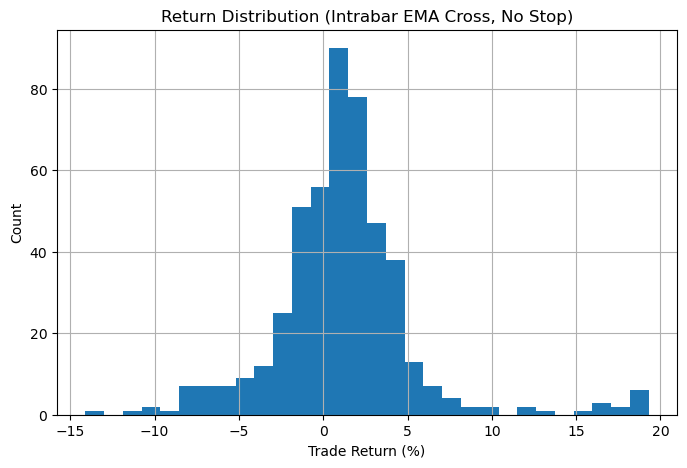

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========= 0) 准备数据 =========
def ensure_merged_df():
    global merged_df
    # 若你会在 Notebook 里提前准备好 merged_df（含 date, O/H/L/C, EMA20, 以及 SIGNAL/TRADE_SIGNAL(_NUM)），这里会直接使用
    try:
        assert isinstance(merged_df, pd.DataFrame)
        return merged_df.copy()
    except Exception:
        # 演示数据：自动下 QQQ + 构造示例 SIGNAL
        import yfinance as yf
        px = yf.download("QQQ", start="2010-01-06", end="2025-08-27")
        px = px.rename_axis('date').reset_index()
        px['EMA20'] = px['Close'].ewm(span=20, adjust=False).mean()
        rng = np.random.default_rng(0)
        raw = rng.normal(0, 1, size=len(px))
        raw[(np.arange(len(px)) % 37) == 0] = -3.0  # 强制 BUY
        raw[(np.arange(len(px)) % 61) == 0] =  3.2  # 强制 SELL
        px['SIGNAL'] = raw
        return px

df = ensure_merged_df().copy()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

# ========= 1) 标准化信号（< -2 = BUY, > 2 = SELL）=========
if 'TRADE_SIGNAL_NUM' in df.columns:
    sig_num = df['TRADE_SIGNAL_NUM']
elif 'TRADE_SIGNAL' in df.columns:
    sig_num = df['TRADE_SIGNAL'].map({'BUY':1, 'SELL':-1}).fillna(0)
elif 'SIGNAL' in df.columns:
    sig_num = np.where(df['SIGNAL'] < -2, 1, np.where(df['SIGNAL'] > 2, -1, 0))
else:
    raise ValueError("需要信号列：TRADE_SIGNAL_NUM 或 TRADE_SIGNAL 或 SIGNAL")

# 确保有 OHLC 与 EMA20
need_cols = {'Open','High','Low','Close','EMA20','date'}
missing = need_cols - set(df.columns)
if missing:
    raise ValueError(f"缺少列：{missing}")

# ========= 2) 入场（信号独立、允许重叠）=========
buy_entries  = df.index[(sig_num == 1) & (df['Close'] < df['EMA20'])].to_list()
sell_entries = df.index[(sig_num == -1) & (df['Close'] > df['EMA20'])].to_list()

NOTIONAL = 10_000.0

def find_exit_intrabar_cross(entry_idx: int, side: int):
    """
    不设止损；仅盘中均线穿越平仓：
      若当日 EMA20 ∈ [Low, High]，认为盘中穿越，按当日 EMA20 作为成交价平仓；
      若直到数据结束仍未穿越，以最后一根的收盘价平仓。
    返回: (exit_idx, exit_price, reason)
    """
    for i in range(entry_idx + 1, len(df)):
        low_i  = float(df.loc[i, 'Low'])
        high_i = float(df.loc[i, 'High'])
        ema_i  = float(df.loc[i, 'EMA20'])
        if low_i <= ema_i <= high_i:
            return i, float(ema_i), 'cross_intrabar'
    last_idx = len(df) - 1
    return last_idx, float(df.loc[last_idx, 'Close']), 'last_close'

def per_trade_metrics(entry_idx: int, exit_idx: int, side: int, exit_px: float, reason: str):
    entry_px   = float(df.loc[entry_idx, 'Close'])   # 仍用收盘价入场；如需改为开盘/其他，可替换
    entry_date = pd.to_datetime(df.loc[entry_idx, 'date'])
    exit_date  = pd.to_datetime(df.loc[exit_idx,  'date'])
    bars_held  = int(exit_idx - entry_idx)
    cal_days   = int((exit_date - entry_date).days)

    # 收益率
    if side == 1:
        ret = (exit_px - entry_px) / entry_px
        lows  = df.loc[entry_idx:exit_idx, 'Low'].astype(float).to_numpy()
        highs = df.loc[entry_idx:exit_idx, 'High'].astype(float).to_numpy()
        path_adverse   = lows / entry_px - 1.0       # 多头：最低越低越不利
        path_favorable = highs / entry_px - 1.0
    else:
        ret = (entry_px - exit_px) / entry_px
        lows  = df.loc[entry_idx:exit_idx, 'Low'].astype(float).to_numpy()
        highs = df.loc[entry_idx:exit_idx, 'High'].astype(float).to_numpy()
        path_adverse   = entry_px / highs - 1.0      # 空头：最高越高越不利
        path_favorable = entry_px / lows  - 1.0

    mae = float(np.min(path_adverse))   if path_adverse.size   else np.nan  # 每笔交易最大不利（负数）
    mfe = float(np.max(path_favorable)) if path_favorable.size else np.nan

    ann_ret = np.nan
    if bars_held > 0 and np.isfinite(ret):
        ann_ret = (1.0 + ret) ** (252.0 / bars_held) - 1.0

    return {
        'side': 'LONG' if side == 1 else 'SHORT',
        'entry_date': entry_date,
        'exit_date': exit_date,
        'bars_held': bars_held,
        'calendar_days': cal_days,
        'entry_px': entry_px,
        'exit_px': float(exit_px),
        'exit_reason': reason,            # cross_intrabar / last_close
        'return': ret,
        'annualized_return': ann_ret,
        'drawdown_MAE': mae,              # 基于盘中极值
        'favorable_MFE': mfe,
        'pnl_usd': ret * NOTIONAL
    }

# ========= 3) 生成独立交易 =========
records = []
for idx in buy_entries:
    e_idx, e_px, rsn = find_exit_intrabar_cross(idx, side=+1)
    records.append(per_trade_metrics(idx, e_idx, +1, e_px, rsn))
for idx in sell_entries:
    e_idx, e_px, rsn = find_exit_intrabar_cross(idx, side=-1)
    records.append(per_trade_metrics(idx, e_idx, -1, e_px, rsn))

trades_df = pd.DataFrame(records).sort_values(['entry_date','side']).reset_index(drop=True)

# ========= 4) 交互式 DataFrame（itables）=========
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)

# 显示可交互表（可排序/筛选/导出）
show(
    trades_df[
        ['side','entry_date','exit_date','bars_held','calendar_days',
         'entry_px','exit_px','exit_reason','return','annualized_return',
         'drawdown_MAE','favorable_MFE','pnl_usd']
    ],
    dom='Bfrtip',
    buttons=["copy", "csv", "excel"],
    paging=True,
    scrollX=True
)

# ========= 5) 收益率分布（独立图）=========
plt.figure(figsize=(8,5))
plt.hist(trades_df['return'] * 100, bins=30)
plt.xlabel('Trade Return (%)')
plt.ylabel('Count')
plt.title('Return Distribution (Intrabar EMA Cross, No Stop)')
plt.grid(True)
plt.show()


LONG 盈利: 91 笔
LONG 亏损: 11 笔
SHORT 盈利: 220 笔
SHORT 亏损: 153 笔


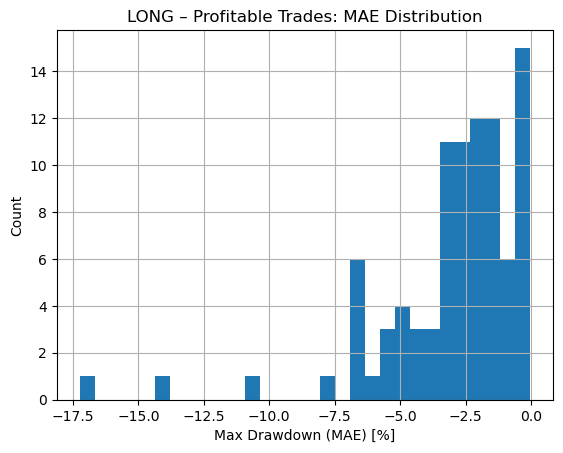

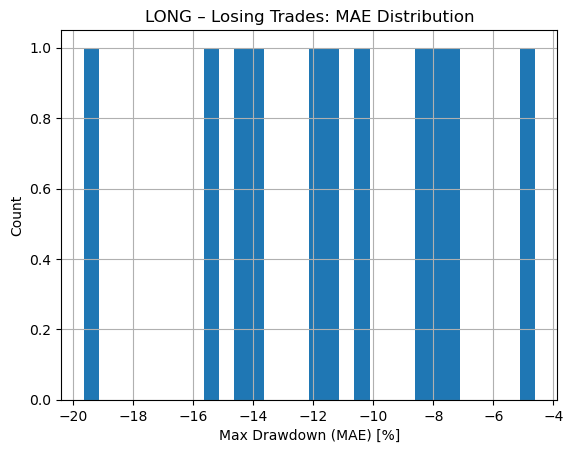

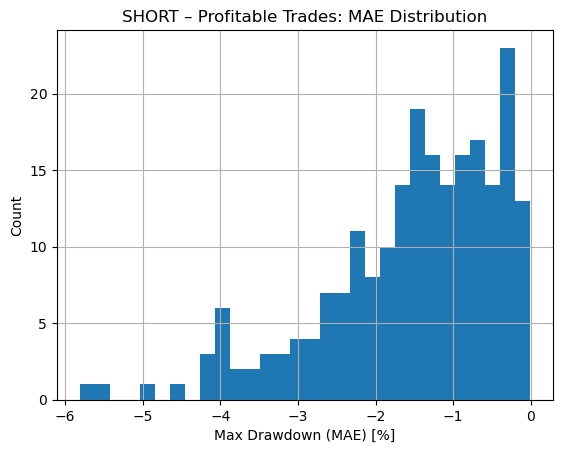

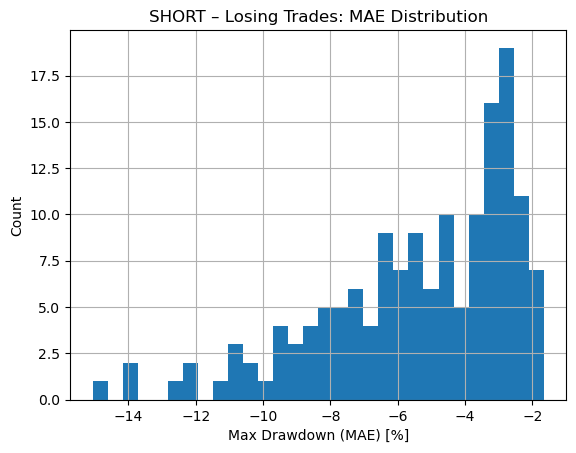

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# 确保这些列存在：side ∈ {'LONG','SHORT'}, return, drawdown_MAE
required_cols = {'side','return','drawdown_MAE'}
missing = required_cols - set(trades_df.columns)
if missing:
    raise ValueError(f"trades_df 缺少列: {missing}")

# 分组筛选
long_prof = trades_df[(trades_df['side'] == 'LONG')  & (trades_df['return'] > 0)]
long_loss = trades_df[(trades_df['side'] == 'LONG')  & (trades_df['return'] < 0)]
short_prof= trades_df[(trades_df['side'] == 'SHORT') & (trades_df['return'] > 0)]
short_loss= trades_df[(trades_df['side'] == 'SHORT') & (trades_df['return'] < 0)]

print(f"LONG 盈利: {len(long_prof)} 笔")
print(f"LONG 亏损: {len(long_loss)} 笔")
print(f"SHORT 盈利: {len(short_prof)} 笔")
print(f"SHORT 亏损: {len(short_loss)} 笔")

# --- LONG 盈利 ---
plt.figure()
plt.hist(long_prof['drawdown_MAE'] * 100, bins=30)
plt.xlabel('Max Drawdown (MAE) [%]')
plt.ylabel('Count')
plt.title('LONG – Profitable Trades: MAE Distribution')
plt.grid(True)
plt.show()

# --- LONG 亏损 ---
plt.figure()
plt.hist(long_loss['drawdown_MAE'] * 100, bins=30)
plt.xlabel('Max Drawdown (MAE) [%]')
plt.ylabel('Count')
plt.title('LONG – Losing Trades: MAE Distribution')
plt.grid(True)
plt.show()

# --- SHORT 盈利 ---
plt.figure()
plt.hist(short_prof['drawdown_MAE'] * 100, bins=30)
plt.xlabel('Max Drawdown (MAE) [%]')
plt.ylabel('Count')
plt.title('SHORT – Profitable Trades: MAE Distribution')
plt.grid(True)
plt.show()

# --- SHORT 亏损 ---
plt.figure()
plt.hist(short_loss['drawdown_MAE'] * 100, bins=30)
plt.xlabel('Max Drawdown (MAE) [%]')
plt.ylabel('Count')
plt.title('SHORT – Losing Trades: MAE Distribution')
plt.grid(True)
plt.show()


### Algo with Stop loss

c:\Users\Yi\anaconda3\Lib\site-packages\itables\typing.py:203: SyntaxWarning: These arguments are not documented in ITableOptions: {'dom'}. You can silence this warning by setting `itables.options.warn_on_undocumented_option=False`. If you believe ITableOptions should be updated, please make a PR or open an issue at https://github.com/mwouts/itables
  warnings.warn(
c:\Users\Yi\anaconda3\Lib\site-packages\itables\typing.py:203: SyntaxWarning: These arguments are not documented in DTForITablesOptions: {'dom'}. You can silence this warning by setting `itables.options.warn_on_undocumented_option=False`. If you believe ITableOptions should be updated, please make a PR or open an issue at https://github.com/mwouts/itables
  warnings.warn(


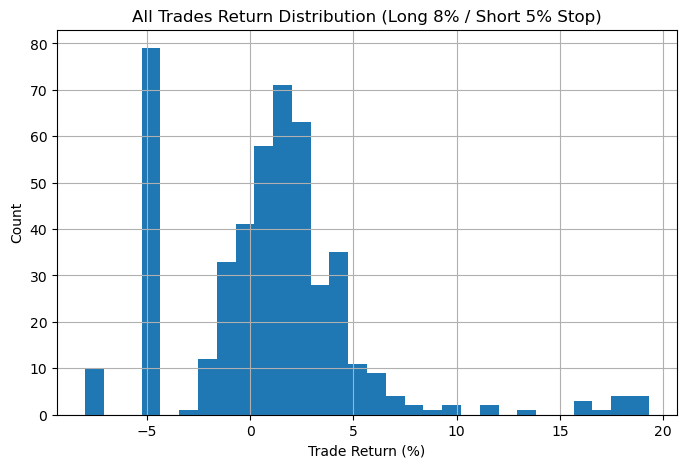

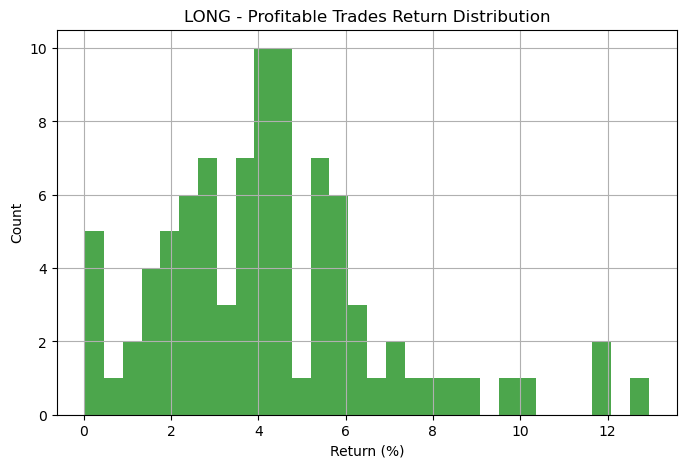

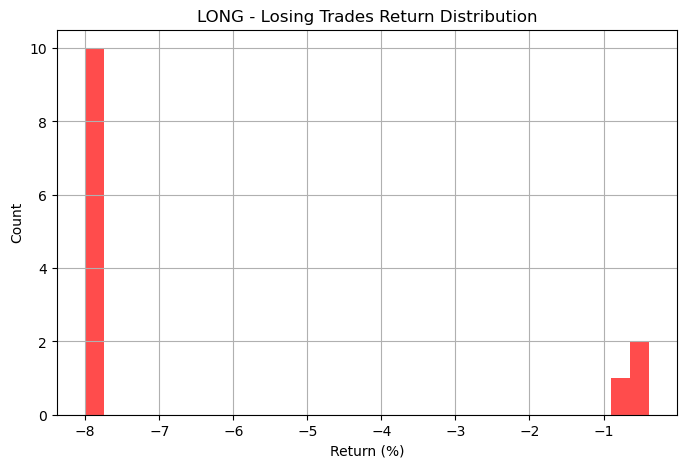

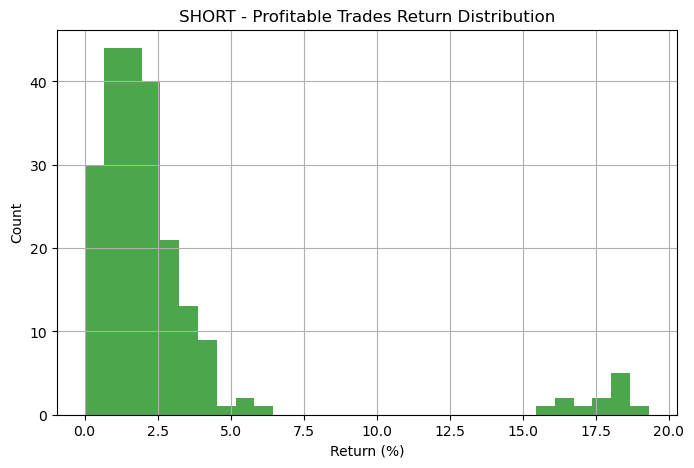

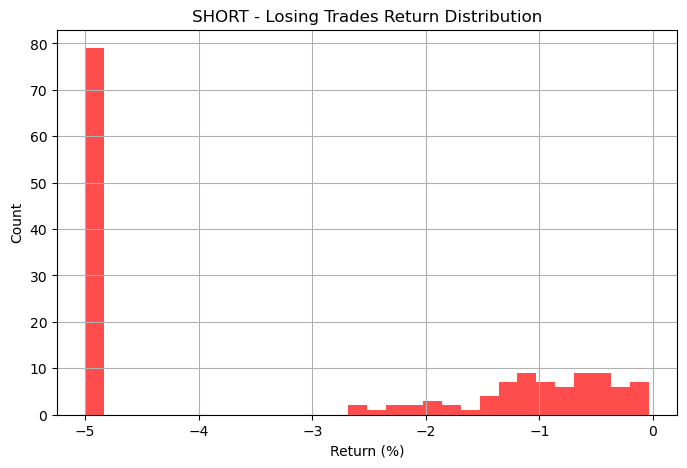

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========== 0. 准备数据 ==========
def ensure_merged_df():
    global merged_df
    try:
        assert isinstance(merged_df, pd.DataFrame)
        return merged_df.copy()
    except:
        import yfinance as yf
        px = yf.download("QQQ", start="2010-01-06", end="2025-08-27")
        px = px.rename_axis('date').reset_index()
        px['EMA20'] = px['Close'].ewm(span=20, adjust=False).mean()
        # 构造示例信号
        rng = np.random.default_rng(0)
        raw = rng.normal(0, 1, size=len(px))
        raw[(np.arange(len(px)) % 37) == 0] = -3.0  # BUY
        raw[(np.arange(len(px)) % 61) == 0] =  3.2  # SELL
        px['SIGNAL'] = raw
        return px

df = ensure_merged_df()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

# ========== 1. 信号标准化 ==========
if 'TRADE_SIGNAL_NUM' in df.columns:
    sig_num = df['TRADE_SIGNAL_NUM']
elif 'TRADE_SIGNAL' in df.columns:
    sig_num = df['TRADE_SIGNAL'].map({'BUY':1, 'SELL':-1}).fillna(0)
else:
    sig_num = np.where(df['SIGNAL'] < -2, 1, np.where(df['SIGNAL'] > 2, -1, 0))

# 检查必需列
need_cols = {'Open','High','Low','Close','EMA20','date'}
missing = need_cols - set(df.columns)
if missing:
    raise ValueError(f"缺少必要列：{missing}")

# ========== 2. 入场 ==========
buy_entries  = df.index[(sig_num == 1) & (df['Close'] < df['EMA20'])].to_list()
sell_entries = df.index[(sig_num == -1) & (df['Close'] > df['EMA20'])].to_list()

NOTIONAL = 10_000.0
STOP_LONG = 0.08   # 多头止损 8%
STOP_SHORT = 0.05  # 空头止损 5%

# ========== 3. 平仓函数 ==========
def find_exit(entry_idx, side):
    entry_px = float(df.loc[entry_idx, 'Close'])
    
    for i in range(entry_idx + 1, len(df)):
        low_i, high_i, ema_i = float(df.loc[i, 'Low']), float(df.loc[i, 'High']), float(df.loc[i, 'EMA20'])

        if side == 1:
            stop_price = entry_px * (1 - STOP_LONG)
            # 先检查止损
            if low_i <= stop_price <= high_i:
                return i, stop_price, 'stop_intrabar'
            # 再检查EMA20穿越
            if low_i <= ema_i <= high_i:
                return i, ema_i, 'cross_intrabar'
        else:
            stop_price = entry_px * (1 + STOP_SHORT)
            # 先检查止损
            if low_i <= stop_price <= high_i:
                return i, stop_price, 'stop_intrabar'
            # 再检查EMA20穿越
            if low_i <= ema_i <= high_i:
                return i, ema_i, 'cross_intrabar'

    # 没触发任何条件，用最后一根收盘价退出
    last_idx = len(df) - 1
    return last_idx, float(df.loc[last_idx, 'Close']), 'last_close'

# ========== 4. 计算每笔交易指标 ==========
def per_trade_metrics(entry_idx, exit_idx, side, exit_px, reason):
    entry_px   = float(df.loc[entry_idx, 'Close'])
    entry_date = pd.to_datetime(df.loc[entry_idx, 'date'])
    exit_date  = pd.to_datetime(df.loc[exit_idx, 'date'])
    bars_held  = int(exit_idx - entry_idx)
    cal_days   = int((exit_date - entry_date).days)

    # 收益率计算
    if side == 1:
        ret = (exit_px - entry_px) / entry_px
    else:
        ret = (entry_px - exit_px) / entry_px

    ann_ret = np.nan
    if bars_held > 0 and np.isfinite(ret):
        ann_ret = (1.0 + ret) ** (252.0 / bars_held) - 1.0

    return {
        'side': 'LONG' if side == 1 else 'SHORT',
        'entry_date': entry_date,
        'exit_date': exit_date,
        'bars_held': bars_held,
        'calendar_days': cal_days,
        'entry_px': entry_px,
        'exit_px': exit_px,
        'exit_reason': reason,
        'return': ret,
        'annualized_return': ann_ret,
        'pnl_usd': ret * NOTIONAL
    }

# ========== 5. 生成交易记录 ==========
records = []
for idx in buy_entries:
    e_idx, e_px, rsn = find_exit(idx, side=+1)
    records.append(per_trade_metrics(idx, e_idx, +1, e_px, rsn))

for idx in sell_entries:
    e_idx, e_px, rsn = find_exit(idx, side=-1)
    records.append(per_trade_metrics(idx, e_idx, -1, e_px, rsn))

trades_df = pd.DataFrame(records).sort_values(['entry_date','side']).reset_index(drop=True)

# ========== 6. Interactive DataFrame ==========
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)

show(
    trades_df[
        ['side','entry_date','exit_date','bars_held','calendar_days',
         'entry_px','exit_px','exit_reason','return','annualized_return','pnl_usd']
    ],
    dom='Bfrtip',
    buttons=["copy", "csv", "excel"],
    paging=True,
    scrollX=True
)

# ========== 7. 所有交易的 return 分布 ==========
plt.figure(figsize=(8,5))
plt.hist(trades_df['return'] * 100, bins=30)
plt.xlabel('Trade Return (%)')
plt.ylabel('Count')
plt.title('All Trades Return Distribution (Long 8% / Short 5% Stop)')
plt.grid(True)
plt.show()

# ========== 8. Long / Short 以及 盈利 / 亏损分布 ==========
long_trades = trades_df[trades_df['side'] == 'LONG']
short_trades = trades_df[trades_df['side'] == 'SHORT']

# 盈利亏损分组
long_prof = long_trades[long_trades['return'] > 0]
long_loss = long_trades[long_trades['return'] < 0]
short_prof = short_trades[short_trades['return'] > 0]
short_loss = short_trades[short_trades['return'] < 0]

# LONG 盈利
plt.figure(figsize=(8,5))
plt.hist(long_prof['return'] * 100, bins=30, color='green', alpha=0.7)
plt.xlabel('Return (%)')
plt.ylabel('Count')
plt.title('LONG - Profitable Trades Return Distribution')
plt.grid(True)
plt.show()

# LONG 亏损
plt.figure(figsize=(8,5))
plt.hist(long_loss['return'] * 100, bins=30, color='red', alpha=0.7)
plt.xlabel('Return (%)')
plt.ylabel('Count')
plt.title('LONG - Losing Trades Return Distribution')
plt.grid(True)
plt.show()

# SHORT 盈利
plt.figure(figsize=(8,5))
plt.hist(short_prof['return'] * 100, bins=30, color='green', alpha=0.7)
plt.xlabel('Return (%)')
plt.ylabel('Count')
plt.title('SHORT - Profitable Trades Return Distribution')
plt.grid(True)
plt.show()

# SHORT 亏损
plt.figure(figsize=(8,5))
plt.hist(short_loss['return'] * 100, bins=30, color='red', alpha=0.7)
plt.xlabel('Return (%)')
plt.ylabel('Count')
plt.title('SHORT - Losing Trades Return Distribution')
plt.grid(True)
plt.show()


In [53]:
# ========= 9. LONG / SHORT 盈利和亏损笔数统计 ==========
# 为交易打标签：盈利(>0) or 亏损(<0)
trades_df['result'] = np.where(trades_df['return'] > 0, 'Profit', 'Loss')

# 分组统计
summary_counts = trades_df.groupby(['side', 'result']).size().unstack(fill_value=0)

print("LONG / SHORT 盈利与亏损笔数统计：")
print(summary_counts)

# 计算总笔数和胜率
summary_counts['Total'] = summary_counts['Profit'] + summary_counts['Loss']
summary_counts['Win Rate (%)'] = (summary_counts['Profit'] / summary_counts['Total'] * 100).round(2)

print("\n包含总笔数和胜率：")
print(summary_counts)

# 如果想输出为一个交互式表格
from itables import show
show(summary_counts.reset_index(), dom='Bfrtip', buttons=["copy","csv","excel"])


LONG / SHORT 盈利与亏损笔数统计：
result  Loss  Profit
side                
LONG      13      89
SHORT    156     217

包含总笔数和胜率：
result  Loss  Profit  Total  Win Rate (%)
side                                     
LONG      13      89    102         87.25
SHORT    156     217    373         58.18


c:\Users\Yi\anaconda3\Lib\site-packages\itables\typing.py:203: SyntaxWarning: These arguments are not documented in ITableOptions: {'dom'}. You can silence this warning by setting `itables.options.warn_on_undocumented_option=False`. If you believe ITableOptions should be updated, please make a PR or open an issue at https://github.com/mwouts/itables
  warnings.warn(
c:\Users\Yi\anaconda3\Lib\site-packages\itables\typing.py:203: SyntaxWarning: These arguments are not documented in DTForITablesOptions: {'dom'}. You can silence this warning by setting `itables.options.warn_on_undocumented_option=False`. If you believe ITableOptions should be updated, please make a PR or open an issue at https://github.com/mwouts/itables
  warnings.warn(


In [54]:
# ========= 10. 计算 return 平均值 ==========
overall_mean_return = trades_df['return'].mean()
long_mean_return = trades_df.loc[trades_df['side'] == 'LONG', 'return'].mean()
short_mean_return = trades_df.loc[trades_df['side'] == 'SHORT', 'return'].mean()

print("Return 平均值统计（单位：%）：")
print(f"所有交易整体平均 return: {overall_mean_return*100:.2f}%")
print(f"LONG 平均 return: {long_mean_return*100:.2f}%")
print(f"SHORT 平均 return: {short_mean_return*100:.2f}%")

# 如果想看整体统计分布情况
print("\n详细描述统计：")
print((trades_df['return'] * 100).describe())


Return 平均值统计（单位：%）：
所有交易整体平均 return: 0.89%
LONG 平均 return: 2.96%
SHORT 平均 return: 0.33%

详细描述统计：
count    475.000000
mean       0.894431
std        4.434133
min       -8.000000
25%       -1.078973
50%        1.192013
75%        2.655433
max       19.311146
Name: return, dtype: float64


持有时间（bars_held）描述统计：

LONG 盈利：
count    89.000000
mean      7.202247
std       3.577645
min       1.000000
25%       5.000000
50%       7.000000
75%      10.000000
max      19.000000
Name: bars_held, dtype: float64

LONG 亏损：
count    13.000000
mean      8.923077
std       6.330634
min       1.000000
25%       3.000000
50%      10.000000
75%      11.000000
max      21.000000
Name: bars_held, dtype: float64

SHORT 盈利：
count    217.000000
mean       9.046083
std        6.583347
min        1.000000
25%        5.000000
50%        8.000000
75%       11.000000
max       36.000000
Name: bars_held, dtype: float64

SHORT 亏损：
count    156.000000
mean      15.820513
std        6.339316
min        2.000000
25%       12.000000
50%       16.000000
75%       20.000000
max       32.000000
Name: bars_held, dtype: float64

ALL 所有交易：
count    475.000000
mean      10.922105
std        6.964061
min        1.000000
25%        6.000000
50%        9.000000
75%       15.000000
max       36.000000
Name: bars_hel

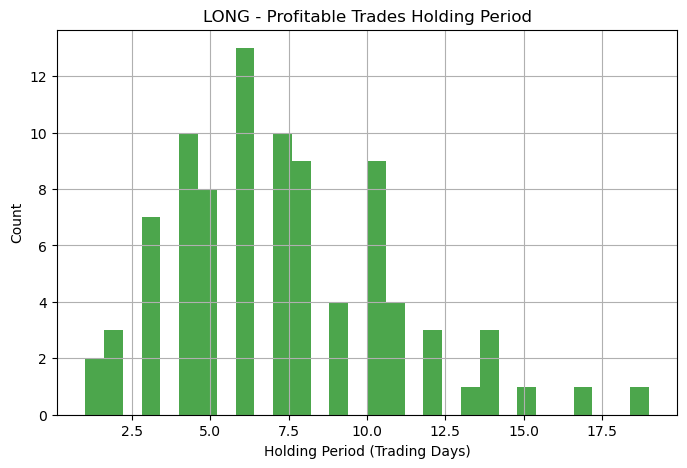

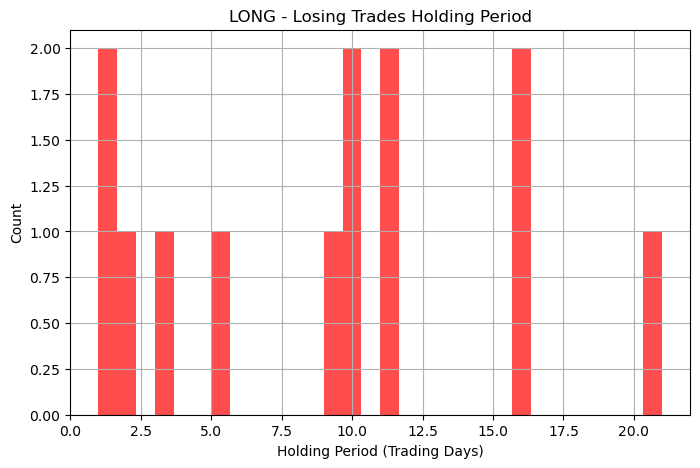

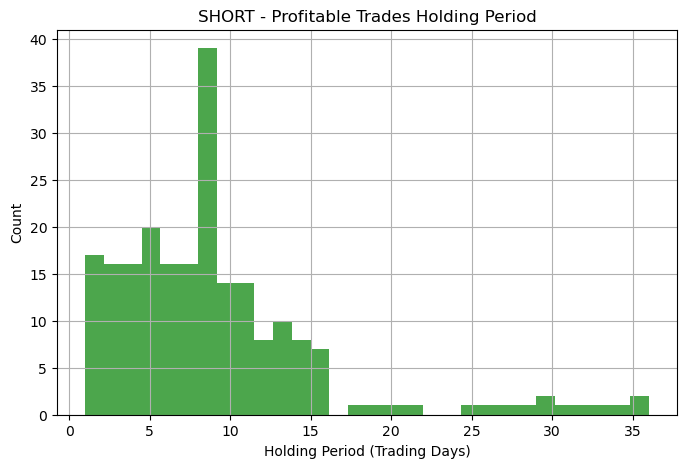

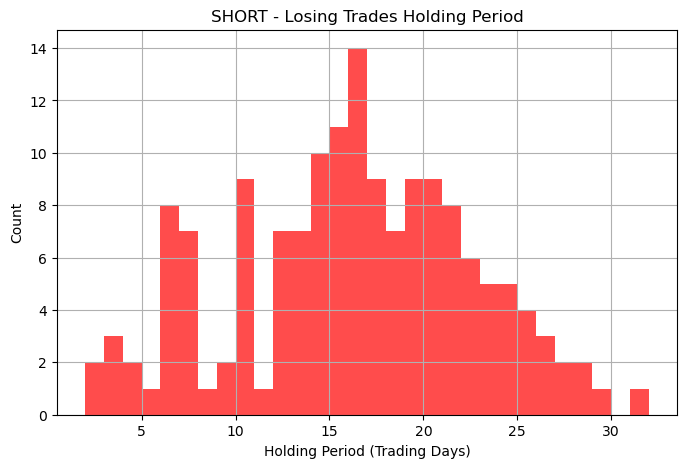

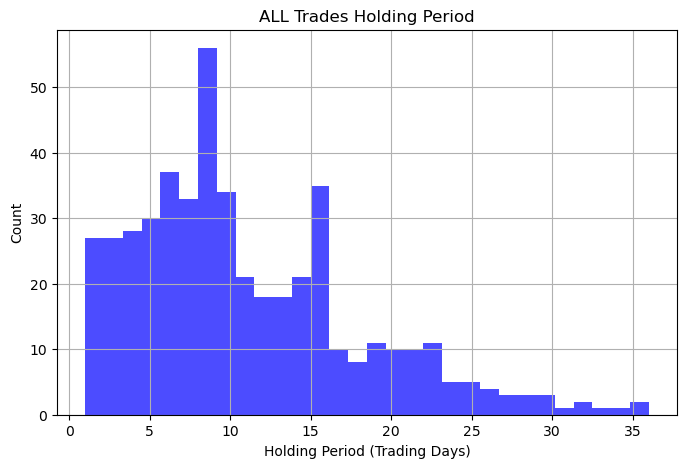

In [55]:
import matplotlib.pyplot as plt

# 确保 trades_df 有 bars_held 和 return
required_cols = {'side','return','bars_held'}
missing = required_cols - set(trades_df.columns)
if missing:
    raise ValueError(f"trades_df 缺少列: {missing}")

# ====== 分组 ======
long_trades = trades_df[trades_df['side'] == 'LONG']
short_trades = trades_df[trades_df['side'] == 'SHORT']

# 盈利 / 亏损
long_prof = long_trades[long_trades['return'] > 0]
long_loss = long_trades[long_trades['return'] < 0]
short_prof = short_trades[short_trades['return'] > 0]
short_loss = short_trades[short_trades['return'] < 0]

# ====== 统计输出 ======
print("持有时间（bars_held）描述统计：")
for name, subset in [
    ('LONG 盈利', long_prof),
    ('LONG 亏损', long_loss),
    ('SHORT 盈利', short_prof),
    ('SHORT 亏损', short_loss),
    ('ALL 所有交易', trades_df)
]:
    if len(subset) > 0:
        print(f"\n{name}：")
        print(subset['bars_held'].describe())
    else:
        print(f"\n{name}：无交易记录")

# ====== 画直方图 ======
def plot_distribution(data, title, color):
    plt.figure(figsize=(8,5))
    plt.hist(data, bins=30, color=color, alpha=0.7)
    plt.xlabel('Holding Period (Trading Days)')
    plt.ylabel('Count')
    plt.title(title)
    plt.grid(True)
    plt.show()

# --- LONG 盈利 ---
plot_distribution(long_prof['bars_held'], "LONG - Profitable Trades Holding Period", "green")

# --- LONG 亏损 ---
plot_distribution(long_loss['bars_held'], "LONG - Losing Trades Holding Period", "red")

# --- SHORT 盈利 ---
plot_distribution(short_prof['bars_held'], "SHORT - Profitable Trades Holding Period", "green")

# --- SHORT 亏损 ---
plot_distribution(short_loss['bars_held'], "SHORT - Losing Trades Holding Period", "red")

# --- 所有交易整体 ---
plot_distribution(trades_df['bars_held'], "ALL Trades Holding Period", "blue")


In [56]:
import pandas as pd
from itables import show

# 确保 trades_df 包含必要列
required_cols = {'side','return','bars_held'}
missing = required_cols - set(trades_df.columns)
if missing:
    raise ValueError(f"trades_df 缺少列: {missing}")

# 定义一个函数来计算 correlation matrix
def compute_correlation(df_subset, label):
    if len(df_subset) == 0:
        print(f"{label} 无交易记录")
        return pd.DataFrame()
    
    # 只取 return 和 bars_held
    corr = df_subset[['return','bars_held']].corr()
    print(f"\n=== {label} Correlation Matrix ===")
    print(corr)
    return corr

# ========== 1. 全部交易 ==========
corr_all = compute_correlation(trades_df, "ALL TRADES")

# ========== 2. LONG ==========
corr_long = compute_correlation(trades_df[trades_df['side'] == 'LONG'], "LONG TRADES")

# ========== 3. SHORT ==========
corr_short = compute_correlation(trades_df[trades_df['side'] == 'SHORT'], "SHORT TRADES")

# ========== 4. 盈利交易 (return > 0) ==========
corr_profit = compute_correlation(trades_df[trades_df['return'] > 0], "ALL PROFIT TRADES")

# ========== 5. 亏损交易 (return < 0) ==========
corr_loss = compute_correlation(trades_df[trades_df['return'] < 0], "ALL LOSS TRADES")

# ========== 6. 交互式展示所有矩阵 ==========
all_corrs = {
    'ALL': corr_all,
    'LONG': corr_long,
    'SHORT': corr_short,
    'PROFIT': corr_profit,
    'LOSS': corr_loss
}

# 将每个矩阵堆叠到一起，方便交互查看
corr_list = []
for name, corr in all_corrs.items():
    if not corr.empty:
        temp = corr.copy()
        temp['Group'] = name
        corr_list.append(temp.reset_index())

if corr_list:
    corr_combined = pd.concat(corr_list, ignore_index=True)
    show(corr_combined, dom='Bfrtip', buttons=["copy","csv","excel"], paging=True, scrollX=True)



=== ALL TRADES Correlation Matrix ===
             return  bars_held
return     1.000000  -0.022352
bars_held -0.022352   1.000000

=== LONG TRADES Correlation Matrix ===
             return  bars_held
return     1.000000  -0.195209
bars_held -0.195209   1.000000

=== SHORT TRADES Correlation Matrix ===
            return  bars_held
return     1.00000    0.08309
bars_held  0.08309    1.00000

=== ALL PROFIT TRADES Correlation Matrix ===
             return  bars_held
return     1.000000   0.457637
bars_held  0.457637   1.000000

=== ALL LOSS TRADES Correlation Matrix ===
             return  bars_held
return     1.000000   0.579794
bars_held  0.579794   1.000000


c:\Users\Yi\anaconda3\Lib\site-packages\itables\typing.py:203: SyntaxWarning: These arguments are not documented in ITableOptions: {'dom'}. You can silence this warning by setting `itables.options.warn_on_undocumented_option=False`. If you believe ITableOptions should be updated, please make a PR or open an issue at https://github.com/mwouts/itables
  warnings.warn(
c:\Users\Yi\anaconda3\Lib\site-packages\itables\typing.py:203: SyntaxWarning: These arguments are not documented in DTForITablesOptions: {'dom'}. You can silence this warning by setting `itables.options.warn_on_undocumented_option=False`. If you believe ITableOptions should be updated, please make a PR or open an issue at https://github.com/mwouts/itables
  warnings.warn(


每年收益（USD）：
exit_year
2010    -1498.024019
2011     6778.238426
2012    -1978.676199
2013     1015.995538
2014     -571.626855
2015     4301.411069
2016     1753.126147
2017     -498.373596
2018     2026.105042
2019     2994.495098
2020    13409.986690
2021     3225.092313
2022    10632.081964
2023    -2603.147560
2024     3312.355587
2025      186.445039
Name: pnl_usd, dtype: float64

策略总收益: 42485.48 USD
每年平均收益: 2655.34 USD


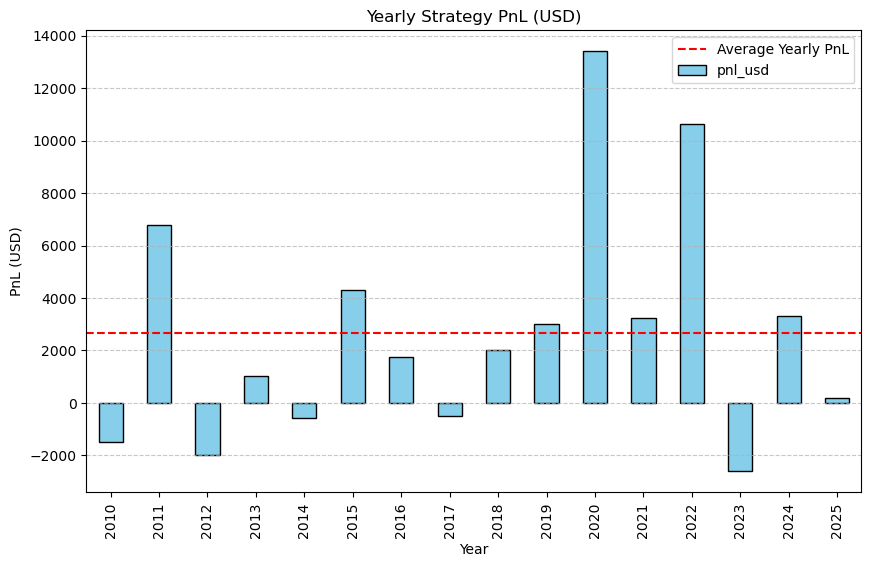

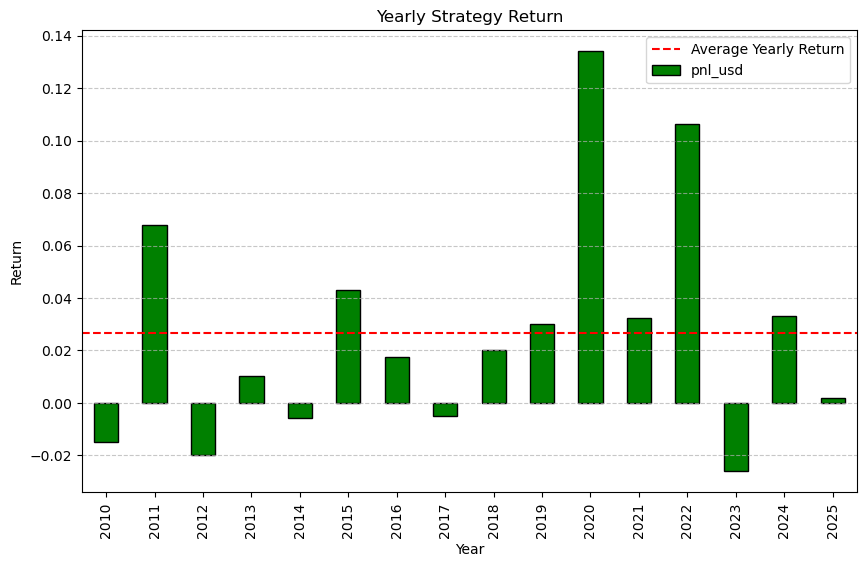


年度统计表：
           Yearly_PnL  Yearly_Return
exit_year                           
2010         -1498.02          -0.01
2011          6778.24           0.07
2012         -1978.68          -0.02
2013          1016.00           0.01
2014          -571.63          -0.01
2015          4301.41           0.04
2016          1753.13           0.02
2017          -498.37          -0.00
2018          2026.11           0.02
2019          2994.50           0.03
2020         13409.99           0.13
2021          3225.09           0.03
2022         10632.08           0.11
2023         -2603.15          -0.03
2024          3312.36           0.03
2025           186.45           0.00


In [57]:
import matplotlib.pyplot as plt

# 确保 trades_df 包含 exit_date 和 pnl_usd
required_cols = {'exit_date','pnl_usd'}
missing = required_cols - set(trades_df.columns)
if missing:
    raise ValueError(f"trades_df 缺少列: {missing}")

# ========= 1. 计算每年总收益 ==========
# 提取年份
trades_df['exit_year'] = trades_df['exit_date'].dt.year

# 按年份汇总
yearly_pnl = trades_df.groupby('exit_year')['pnl_usd'].sum()

print("每年收益（USD）：")
print(yearly_pnl)

# ========= 2. 计算总收益 & 平均收益 ==========
total_pnl = yearly_pnl.sum()
average_pnl = yearly_pnl.mean()

print(f"\n策略总收益: {total_pnl:.2f} USD")
print(f"每年平均收益: {average_pnl:.2f} USD")

# ========= 3. 绘制柱状图 ==========
plt.figure(figsize=(10,6))
yearly_pnl.plot(kind='bar', color='skyblue', edgecolor='black')
plt.axhline(average_pnl, color='red', linestyle='--', label='Average Yearly PnL')
plt.title('Yearly Strategy PnL (USD)')
plt.xlabel('Year')
plt.ylabel('PnL (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# ========= 4. 查看每年 Return 分布 ==========
# 如果有初始资金，可以计算 Return
initial_capital = 100000  # 假设 10w 初始资金
yearly_return = yearly_pnl / initial_capital

plt.figure(figsize=(10,6))
yearly_return.plot(kind='bar', color='green', edgecolor='black')
plt.axhline(yearly_return.mean(), color='red', linestyle='--', label='Average Yearly Return')
plt.title('Yearly Strategy Return')
plt.xlabel('Year')
plt.ylabel('Return')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# ========= 5. 输出统计表 ==========
yearly_stats = pd.DataFrame({
    'Yearly_PnL': yearly_pnl,
    'Yearly_Return': yearly_return
})
print("\n年度统计表：")
print(yearly_stats.round(2))


每年最大回撤（MDD）：
2010    -1.99 %
2011      0.0 %
2012    -2.78 %
2013    -0.01 %
2014     -0.7 %
2015    -0.76 %
2016     -0.3 %
2017    -0.63 %
2018    -0.71 %
2019    -0.47 %
2020    -7.41 %
2021    -0.76 %
2022    -2.38 %
2023    -2.53 %
2024    -1.43 %
2025    -2.52 %
dtype: object

平均最大回撤: -1.59 %


C:\Users\Yi\AppData\Local\Temp\ipykernel_35128\3747776608.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 8.67117046e+01 -3.87740154e+01  2.32644557e+02 -5.00000000e+02
 -5.00000000e+02 -5.00000000e+02 -5.00000000e+02  2.83382176e+02
  3.91986578e+01  4.32260429e+02  2.94636854e+02  6.71915617e+02
 -5.00000000e+02 -5.00000000e+02 -5.00000000e+02  1.44467570e+02
  4.99831061e+02  1.27665675e+03  1.90823383e+03  5.46912435e+02
  9.06551759e+02  1.49558502e+03 -1.50000000e+03 -5.00000000e+02
 -9.30880815e+02  4.42005378e+02 -5.27939979e+01  4.76718710e+01
  5.15321364e+02  3.29719313e+02 -8.88757082e+00  2.69963442e+02
  3.12807758e+02  1.12392596e+02 -1.40239577e+02  3.00872244e+02
 -5.00000000e+02 -2.32259522e+02  7.50914630e+02  5.56375366e+02
 -8.00000000e+02  1.40394131e+03  7.78720601e+02  1.61145916e+03
  5.82239862e+02  4.36113489e+02  4.15493024e+02  1.93678459e+02
  4.59522337e+02 -3.339210

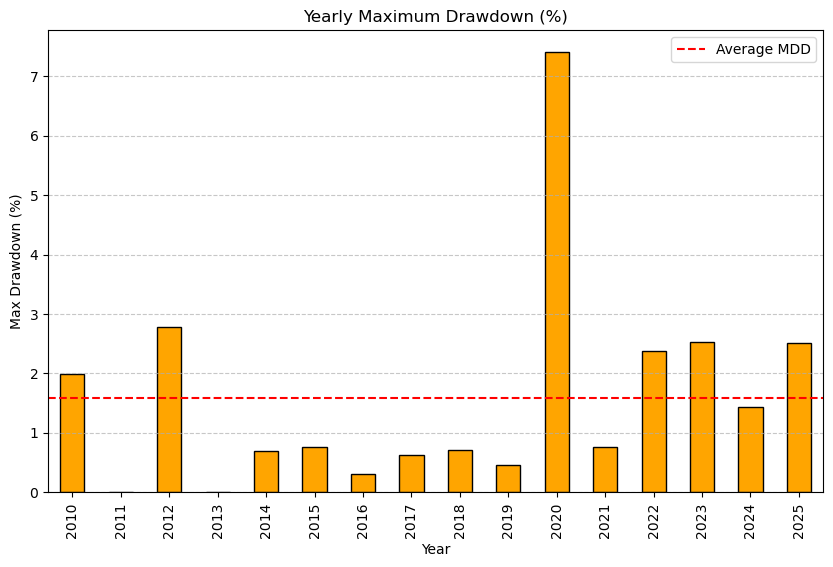


年度最大回撤统计表：
      Yearly_MDD_%
2010         -1.99
2011          0.00
2012         -2.78
2013         -0.01
2014         -0.70
2015         -0.76
2016         -0.30
2017         -0.63
2018         -0.71
2019         -0.47
2020         -7.41
2021         -0.76
2022         -2.38
2023         -2.53
2024         -1.43
2025         -2.52


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 确保 trades_df 中有 exit_date 和 pnl_usd
required_cols = {'exit_date', 'pnl_usd'}
missing = required_cols - set(trades_df.columns)
if missing:
    raise ValueError(f"trades_df 缺少列: {missing}")

# ========== 1. 构建每日净值曲线 ==========
initial_capital = 100000  # 初始资金，可根据实际调整

# 按交易退出日期汇总当日总PnL
daily_pnl = trades_df.groupby('exit_date')['pnl_usd'].sum()

# 生成完整日期范围，填补空缺日期
date_range = pd.date_range(df['date'].min(), df['date'].max(), freq='B')  # 只考虑交易日
equity_curve = pd.Series(0, index=date_range)
equity_curve.update(daily_pnl)

# 累计求和得到策略资金曲线
equity_curve = initial_capital + equity_curve.cumsum()

# ========== 2. 按年份计算最大回撤 ==========
def calculate_mdd(series):
    """计算一个时间序列的最大回撤"""
    rolling_max = series.cummax()
    drawdown = (series - rolling_max) / rolling_max
    return drawdown.min()  # 返回负数

# 计算每年最大回撤
yearly_mdd = {}
for year, group in equity_curve.groupby(equity_curve.index.year):
    yearly_mdd[year] = calculate_mdd(group)

yearly_mdd = pd.Series(yearly_mdd).sort_index()

# ========== 3. 输出结果 ==========
print("每年最大回撤（MDD）：")
print((yearly_mdd * 100).round(2).astype(str) + ' %')

print(f"\n平均最大回撤: {yearly_mdd.mean() * 100:.2f} %")

# ========== 4. 可视化 ==========
plt.figure(figsize=(10,6))
(yearly_mdd * 100 * -1).plot(kind='bar', color='orange', edgecolor='black')  # 取正数显示
plt.axhline(-yearly_mdd.mean()*100, color='red', linestyle='--', label='Average MDD')
plt.title('Yearly Maximum Drawdown (%)')
plt.xlabel('Year')
plt.ylabel('Max Drawdown (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# ========== 5. 输出统计表 ==========
yearly_stats = pd.DataFrame({
    'Yearly_MDD': yearly_mdd
})
yearly_stats['Yearly_MDD_%'] = (yearly_stats['Yearly_MDD'] * 100).round(2)
print("\n年度最大回撤统计表：")
print(yearly_stats[['Yearly_MDD_%']])


年度统计：
      Strategy_Return  Strategy_MDD  QQQ_Return  QQQ_MDD  QQQ_Volatility
2010            -1.50         -1.99       19.13   -15.61           19.05
2011             6.88          0.00        1.89   -16.10           23.33
2012            -1.88         -2.78       18.11   -11.64           15.00
2013             0.98         -0.01       36.63    -5.85           12.03
2014            -0.55         -0.70       19.18    -8.25           13.59
2015             4.15         -0.76        9.44   -13.94           17.56
2016             1.62         -0.30        7.10   -13.89           15.89
2017            -0.45         -0.63       32.66    -4.88           10.14
2018             1.85         -0.71       -0.13   -22.80           22.45
2019             2.69         -0.47       38.96   -10.98           15.91
2020            11.73         -7.41       48.41   -28.56           35.02
2021             2.52         -0.76       27.42   -10.85           17.90
2022             8.12         -2.38      -33.

C:\Users\Yi\AppData\Local\Temp\ipykernel_35128\1496602344.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 8.67117046e+01 -3.87740154e+01  2.32644557e+02 -5.00000000e+02
 -5.00000000e+02 -5.00000000e+02 -5.00000000e+02  2.83382176e+02
  3.91986578e+01  4.32260429e+02  2.94636854e+02  6.71915617e+02
 -5.00000000e+02 -5.00000000e+02 -5.00000000e+02  1.44467570e+02
  4.99831061e+02  1.27665675e+03  1.90823383e+03  5.46912435e+02
  9.06551759e+02  1.49558502e+03 -1.50000000e+03 -5.00000000e+02
 -9.30880815e+02  4.42005378e+02 -5.27939979e+01  4.76718710e+01
  5.15321364e+02  3.29719313e+02 -8.88757082e+00  2.69963442e+02
  3.12807758e+02  1.12392596e+02 -1.40239577e+02  3.00872244e+02
 -5.00000000e+02 -2.32259522e+02  7.50914630e+02  5.56375366e+02
 -8.00000000e+02  1.40394131e+03  7.78720601e+02  1.61145916e+03
  5.82239862e+02  4.36113489e+02  4.15493024e+02  1.93678459e+02
  4.59522337e+02 -3.339210

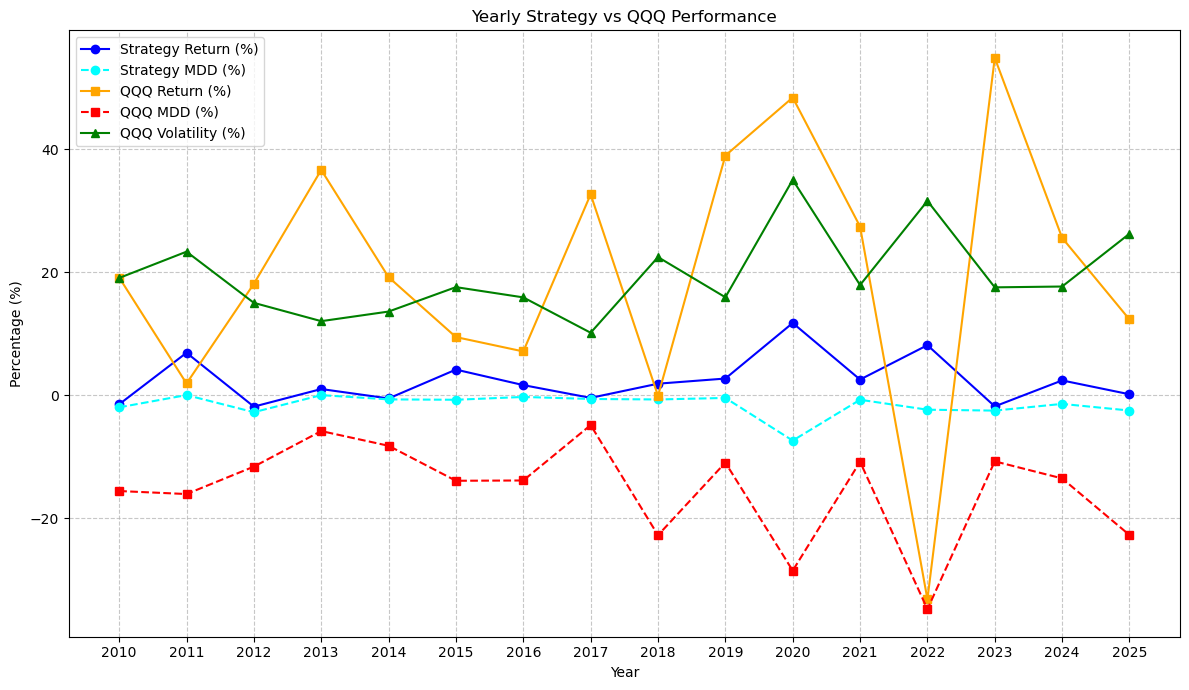

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========== 1. 获取策略每日资金曲线 ==========
initial_capital = 100000  # 初始资金，可调整

# 将每日 PnL 汇总到退出日
daily_pnl = trades_df.groupby('exit_date')['pnl_usd'].sum()

# 创建完整交易日范围
date_range = pd.date_range(df['date'].min(), df['date'].max(), freq='B')  # B = business day
equity_curve = pd.Series(0, index=date_range)
equity_curve.update(daily_pnl)
equity_curve = initial_capital + equity_curve.cumsum()

# ========== 2. 获取 QQQ 收盘价数据 ==========
# 如果 df 已包含 QQQ 数据
qqq_prices = df.set_index('date')['Close'].reindex(date_range).fillna(method='ffill')

# 计算每日收益率
qqq_returns = qqq_prices.pct_change()

# ========== 3. 定义函数计算年度收益与MDD ==========
def calculate_mdd(series):
    """计算最大回撤，返回负数"""
    rolling_max = series.cummax()
    drawdown = (series - rolling_max) / rolling_max
    return drawdown.min()

def calculate_yearly_stats(equity_series, label):
    """计算每年的年度收益和MDD"""
    yearly_pnl = {}
    yearly_mdd = {}

    for year, group in equity_series.groupby(equity_series.index.year):
        # 年度收益 = 最后一天净值 / 年初净值 - 1
        start_val = group.iloc[0]
        end_val = group.iloc[-1]
        yearly_pnl[year] = (end_val / start_val - 1) if start_val != 0 else 0
        
        # 年度最大回撤
        yearly_mdd[year] = calculate_mdd(group)
    
    return pd.Series(yearly_pnl, name=f"{label}_Return"), pd.Series(yearly_mdd, name=f"{label}_MDD")

# 策略
strategy_return, strategy_mdd = calculate_yearly_stats(equity_curve, "Strategy")

# QQQ
qqq_return, qqq_mdd = calculate_yearly_stats(qqq_prices, "QQQ")

# ========== 4. 计算 QQQ 年度波动率 ==========
qqq_vol = {}
for year, group in qqq_returns.groupby(qqq_returns.index.year):
    daily_vol = group.std()
    qqq_vol[year] = daily_vol * np.sqrt(252) if not np.isnan(daily_vol) else np.nan

qqq_vol = pd.Series(qqq_vol, name='QQQ_Volatility')

# ========== 5. 合并所有年度指标 ==========
combined = pd.concat([strategy_return, strategy_mdd, qqq_return, qqq_mdd, qqq_vol], axis=1)

print("年度统计：")
print((combined * 100).round(2))  # 百分比显示

# ========== 6. 可视化 ==========
plt.figure(figsize=(12,7))

years = combined.index.astype(str)

# 策略收益
plt.plot(years, combined['Strategy_Return']*100, marker='o', label='Strategy Return (%)', color='blue')

# 策略 MDD
plt.plot(years, combined['Strategy_MDD']*100, marker='o', linestyle='--', label='Strategy MDD (%)', color='cyan')

# QQQ 收益
plt.plot(years, combined['QQQ_Return']*100, marker='s', label='QQQ Return (%)', color='orange')

# QQQ MDD
plt.plot(years, combined['QQQ_MDD']*100, marker='s', linestyle='--', label='QQQ MDD (%)', color='red')

# QQQ 波动率
plt.plot(years, combined['QQQ_Volatility']*100, marker='^', label='QQQ Volatility (%)', color='green')

plt.title('Yearly Strategy vs QQQ Performance')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


五个年度指标的相关性矩阵：
                 Strategy_Return  Strategy_MDD  QQQ_Return  QQQ_MDD  \
Strategy_Return            1.000        -0.442      -0.236   -0.669   
Strategy_MDD              -0.442         1.000      -0.261    0.567   
QQQ_Return                -0.236        -0.261       1.000    0.542   
QQQ_MDD                   -0.669         0.567       0.542    1.000   
QQQ_Volatility             0.760        -0.689      -0.324   -0.945   

                 QQQ_Volatility  
Strategy_Return           0.760  
Strategy_MDD             -0.689  
QQQ_Return               -0.324  
QQQ_MDD                  -0.945  
QQQ_Volatility            1.000  


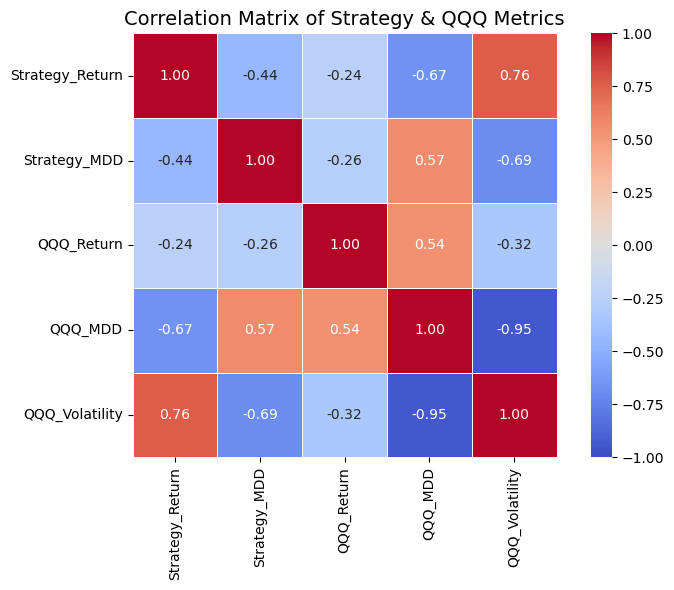

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# ========= 1. 计算相关矩阵 ==========
# 使用前面生成的 combined DataFrame
# combined 包含五列：Strategy_Return, Strategy_MDD, QQQ_Return, QQQ_MDD, QQQ_Volatility
# 这些值都是小数，相关系数无需转换百分比

correlation_matrix = combined.corr()

print("五个年度指标的相关性矩阵：")
print(correlation_matrix.round(3))

# ========= 2. 可视化为热力图 ==========
plt.figure(figsize=(8,6))
sns.heatmap(
    correlation_matrix,
    annot=True,            # 在格子里显示数值
    fmt=".2f",             # 数值格式保留2位小数
    cmap='coolwarm',       # 色系
    vmin=-1, vmax=1,       # 相关系数范围
    linewidths=0.5,
    square=True
)
plt.title('Correlation Matrix of Strategy & QQQ Metrics', fontsize=14)
plt.tight_layout()
plt.show()


### Update Signal with upper bound of 2.5

=== Strategy Performance (No Stop, Intrabar EMA20 Exit) ===
Period                 : 2010-01-06 ~ 2025-08-26 (15.64 yrs)
Initial Capital        : $100,000
Total Return           : 47.57%
CAGR                   : 2.52%
Annualized Volatility  : 1.96%
Sharpe Ratio           : 1.234
Sortino Ratio          : 0.154
Max Drawdown (MDD)     : -2.43%
Calmar Ratio           : 1.035
Trades                 : 193
Win Rate               : 79.79%
Average Trade Return   : 2.465% (median 2.748%)
Average Bars Held      : 9.69
Profit Factor          : 5.686
Expectancy per Trade   : 2.465%

By Side:
       trades  win_rate  avg_ret     pnl_usd
side                                        
LONG      102   89.2157   0.0363  37034.0150
SHORT      91   69.2308   0.0116  10534.6872

Yearly Returns (%):
2011    5.01
2012    1.33
2013    0.00
2014    0.51
2015    3.17
2016    1.34
2017    0.00
2018    1.46
2019    2.67
2020    8.08
2021    0.57
2022    9.42
2023    0.79
2024    2.10
2025    2.29
dtype: float64


C:\Users\Yi\AppData\Local\Temp\ipykernel_35128\1427555314.py:174: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_ret = equity_curve.resample('Y').last().pct_change().dropna()


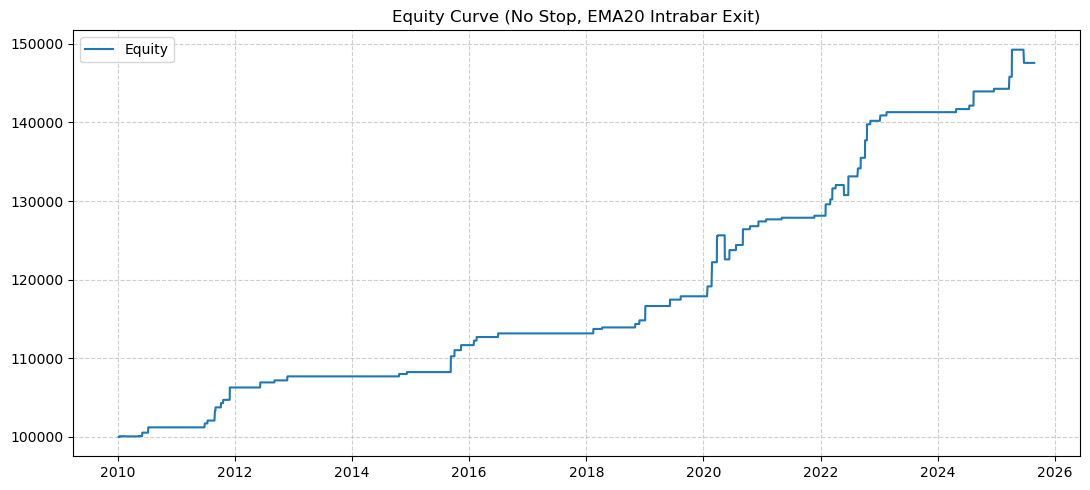

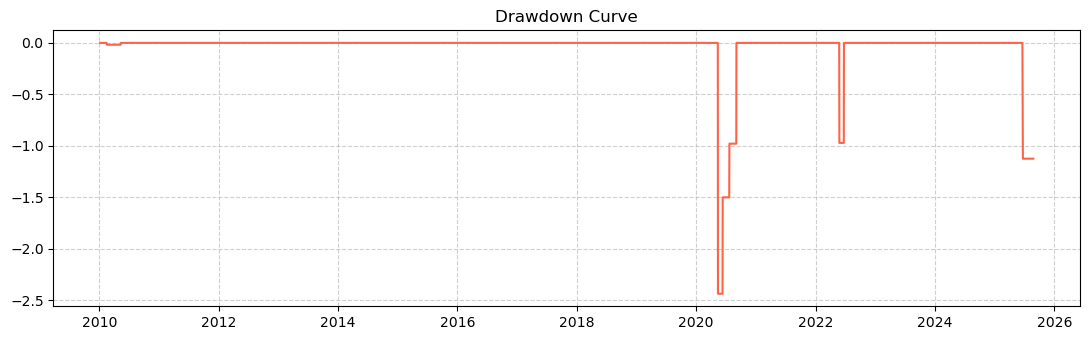

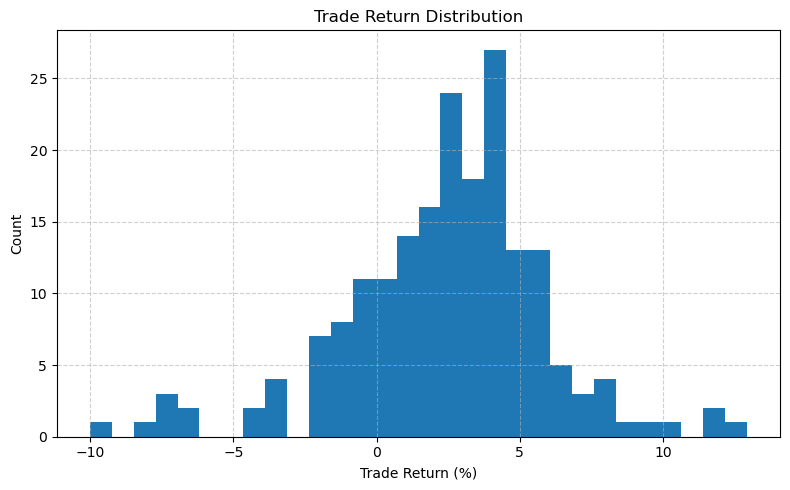

c:\Users\Yi\anaconda3\Lib\site-packages\itables\typing.py:203: SyntaxWarning: These arguments are not documented in ITableOptions: {'dom'}. You can silence this warning by setting `itables.options.warn_on_undocumented_option=False`. If you believe ITableOptions should be updated, please make a PR or open an issue at https://github.com/mwouts/itables
  warnings.warn(
c:\Users\Yi\anaconda3\Lib\site-packages\itables\typing.py:203: SyntaxWarning: These arguments are not documented in DTForITablesOptions: {'dom'}. You can silence this warning by setting `itables.options.warn_on_undocumented_option=False`. If you believe ITableOptions should be updated, please make a PR or open an issue at https://github.com/mwouts/itables
  warnings.warn(


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========== 0) 数据准备 ==========
def ensure_merged_df():

    global merged_df

    assert isinstance(merged_df, pd.DataFrame)
    return merged_df.copy()


df = ensure_merged_df().copy()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

# 必要列检查
need = {'date','Open','High','Low','Close','EMA20','SIGNAL'}
missing = need - set(df.columns)
if missing:
    raise ValueError(f"缺少必要列: {missing}")

# ========== 1) 新信号：上界从 2 调整为 2.5（下界仍为 -2）==========
#   SIGNAL < -2  → BUY(1)
#   SIGNAL > 2.5 → SELL(-1)
#   其他 → 0
df['signal_new'] = np.where(df['SIGNAL'] < -2, 1, np.where(df['SIGNAL'] > 2.5, -1, 0))

# ========== 2) 入场（信号独立、允许重叠）==========
buy_entries  = df.index[(df['signal_new'] == 1) & (df['Close'] < df['EMA20'])].to_list()
sell_entries = df.index[(df['signal_new'] == -1) & (df['Close'] > df['EMA20'])].to_list()

NOTIONAL = 10_000.0  # 每笔名义
# 无止损；仅盘中 EMA20 穿越平仓：若当日 EMA20 ∈ [Low, High]，以 EMA20 作为成交价；否则最后一根收盘价离场
def find_exit_with_gap_open(entry_idx: int, side: int):
    """
    无止损版出场逻辑（修复隔夜跳空越过 EMA 的漏洞）：
      优先级：
        1) 隔夜跳空跨越 EMA_{t-1} -> 当天按 Open 平仓（gap_open_exit）
        2) 盘中触碰 EMA_t ( EMA_t ∈ [Low_t, High_t] ) -> 按 EMA_t 平仓（cross_intrabar）
        3) 数据结束 -> 最后一根收盘平仓（last_close）
    说明：
      - 开盘判断用前一日的 EMA20，避免使用当日收盘才知道的 EMA_t（前视）。
      - 盘中判断沿用你之前的口径：使用当日 EMA_t 是否落在当日高低区间内。
    """
    for i in range(entry_idx + 1, len(df)):
        o_i   = float(df.loc[i,   'Open'])
        low_i = float(df.loc[i,   'Low'])
        high_i= float(df.loc[i,   'High'])
        ema_im1 = float(df.loc[i-1,'EMA20'])  # 昨日 EMA
        ema_i   = float(df.loc[i,  'EMA20'])  # 当日 EMA（仅用于盘中触碰判断）

        # 1) 隔夜跳空跨越 EMA（按开盘价出场）
        if side == 1:   # LONG：若开盘已在/上于昨日EMA，则视为隔夜上穿 -> 开盘平
            if o_i >= ema_im1:
                return i, o_i, 'gap_open_exit'
        else:           # SHORT：若开盘已在/下于昨日EMA，则视为隔夜下穿 -> 开盘平
            if o_i <= ema_im1:
                return i, o_i, 'gap_open_exit'

        # 2) 当日盘中触碰 EMA（按 EMA 当日值出场）
        if low_i <= ema_i <= high_i:
            return i, ema_i, 'cross_intrabar'

    # 3) 一直未触发 -> 最后一根收盘平
    last_idx = len(df) - 1
    return last_idx, float(df.loc[last_idx, 'Close']), 'last_close'


def per_trade_metrics(entry_idx: int, side: int, exit_idx: int, exit_px: float, reason: str):
    entry_px   = float(df.loc[entry_idx, 'Close'])  # 入场按当日收盘
    entry_date = pd.to_datetime(df.loc[entry_idx, 'date'])
    exit_date  = pd.to_datetime(df.loc[exit_idx,  'date'])
    bars_held  = int(exit_idx - entry_idx)
    cal_days   = int((exit_date - entry_date).days)

    if side == 1:
        ret = (exit_px - entry_px) / entry_px
    else:
        ret = (entry_px - exit_px) / entry_px

    ann_ret = np.nan
    if bars_held > 0 and np.isfinite(ret):
        ann_ret = (1.0 + ret) ** (252.0 / bars_held) - 1.0

    return {
        'side': 'LONG' if side == 1 else 'SHORT',
        'entry_date': entry_date,
        'exit_date': exit_date,
        'bars_held': bars_held,
        'calendar_days': cal_days,
        'entry_px': entry_px,
        'exit_px': float(exit_px),
        'exit_reason': reason,
        'return': ret,
        'annualized_return': ann_ret,
        'pnl_usd': ret * NOTIONAL
    }

# 生成交易
records = []
for idx in buy_entries:
    e_idx, e_px, rsn = find_exit_with_gap_open(idx, side=+1)
    records.append(per_trade_metrics(idx, +1, e_idx, e_px, rsn))

for idx in sell_entries:
    e_idx, e_px, rsn = find_exit_with_gap_open(idx, side=-1)
    records.append(per_trade_metrics(idx, -1, e_idx, e_px, rsn))

trades_df = pd.DataFrame(records).sort_values(['entry_date','side']).reset_index(drop=True)

# ========== 3) 组合级资金曲线（以“出场日记入当日PnL”的方式累计）==========
initial_capital = 100_000.0
date_range = pd.date_range(df['date'].min(), df['date'].max(), freq='B')  # 交易日索引
daily_pnl = trades_df.groupby('exit_date')['pnl_usd'].sum()
equity_curve = pd.Series(0.0, index=date_range)
equity_curve.update(daily_pnl)
equity_curve = initial_capital + equity_curve.cumsum()
daily_ret = equity_curve.pct_change().fillna(0.0)

# ========== 4) Performance Metrics ==========
def max_drawdown(series: pd.Series):
    roll_max = series.cummax()
    dd = (series - roll_max) / roll_max
    return dd.min(), dd  # 返回最小值（负数）和序列

def sharpe_ratio(daily_ret, rf=0.0):
    mu = daily_ret.mean()
    sigma = daily_ret.std()
    if sigma == 0 or np.isnan(sigma):
        return np.nan
    return (mu - rf/252) * np.sqrt(252) / sigma

def sortino_ratio(daily_ret, rf=0.0):
    downside = daily_ret[daily_ret < 0]
    ds = downside.std()
    mu = daily_ret.mean()
    if ds == 0 or np.isnan(ds):
        return np.nan
    return (mu - rf/252) * np.sqrt(252) / ds

total_return = equity_curve.iloc[-1] / equity_curve.iloc[0] - 1.0
years = (equity_curve.index[-1] - equity_curve.index[0]).days / 365.25
cagr = (1.0 + total_return) ** (1/years) - 1.0 if years > 0 else np.nan
ann_vol = daily_ret.std() * np.sqrt(252)
sr = sharpe_ratio(daily_ret)
so = sortino_ratio(daily_ret)
mdd, dd_series = max_drawdown(equity_curve)
calmar = (cagr / abs(mdd)) if mdd < 0 else np.nan

# 交易级指标
n_trades = len(trades_df)
win_rate = (trades_df['return'] > 0).mean() if n_trades else np.nan
avg_ret = trades_df['return'].mean() if n_trades else np.nan
med_ret = trades_df['return'].median() if n_trades else np.nan
avg_bars = trades_df['bars_held'].mean() if n_trades else np.nan
gross_profit = trades_df.loc[trades_df['pnl_usd'] > 0, 'pnl_usd'].sum()
gross_loss   = trades_df.loc[trades_df['pnl_usd'] < 0, 'pnl_usd'].sum()
profit_factor = (gross_profit / abs(gross_loss)) if gross_loss != 0 else np.inf
avg_win = trades_df.loc[trades_df['return'] > 0, 'return'].mean()
avg_loss = trades_df.loc[trades_df['return'] < 0, 'return'].mean()
expectancy = (win_rate * avg_win + (1 - win_rate) * (avg_loss if not np.isnan(avg_loss) else 0)) if n_trades else np.nan

# 多空分组
summary_side = trades_df.groupby('side').agg(
    trades=('return','count'),
    win_rate=('return', lambda s: (s>0).mean()),
    avg_ret=('return','mean'),
    pnl_usd=('pnl_usd','sum')
)

# 年度收益（基于资金曲线每年首末值）
yearly_ret = equity_curve.resample('Y').last().pct_change().dropna()
yearly_ret.index = yearly_ret.index.year

# ========== 5) 输出指标 ==========
print("=== Strategy Performance (No Stop, Intrabar EMA20 Exit) ===")
print(f"Period                 : {equity_curve.index[0].date()} ~ {equity_curve.index[-1].date()} ({years:.2f} yrs)")
print(f"Initial Capital        : ${initial_capital:,.0f}")
print(f"Total Return           : {total_return*100:.2f}%")
print(f"CAGR                   : {cagr*100:.2f}%")
print(f"Annualized Volatility  : {ann_vol*100:.2f}%")
print(f"Sharpe Ratio           : {sr:.3f}")
print(f"Sortino Ratio          : {so:.3f}")
print(f"Max Drawdown (MDD)     : {mdd*100:.2f}%")
print(f"Calmar Ratio           : {calmar:.3f}")
print(f"Trades                 : {n_trades}")
print(f"Win Rate               : {win_rate*100:.2f}%")
print(f"Average Trade Return   : {avg_ret*100:.3f}% (median {med_ret*100:.3f}%)")
print(f"Average Bars Held      : {avg_bars:.2f}")
print(f"Profit Factor          : {profit_factor:.3f}")
print(f"Expectancy per Trade   : {expectancy*100:.3f}%")
print("\nBy Side:")
print(summary_side.assign(win_rate=lambda d:(d['win_rate']*100)).round(4))

print("\nYearly Returns (%):")
print((yearly_ret*100).round(2))

# ========== 6) 图表：权益 & 回撤、收益分布 ==========
plt.figure(figsize=(11,5))
plt.plot(equity_curve.index, equity_curve.values, label='Equity')
plt.title('Equity Curve (No Stop, EMA20 Intrabar Exit)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(11,3.5))
plt.plot(dd_series.index, dd_series.values*100, label='Drawdown (%)', color='tomato')
plt.title('Drawdown Curve')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,5))
plt.hist(trades_df['return']*100, bins=30)
plt.xlabel('Trade Return (%)'); plt.ylabel('Count')
plt.title('Trade Return Distribution')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(); plt.show()

# ========== 7) 交互式交易明细 ==========
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)
cols = ['side','entry_date','exit_date','bars_held','calendar_days',
        'entry_px','exit_px','exit_reason','return','annualized_return','pnl_usd']
show(trades_df[cols], dom='Bfrtip', buttons=["copy","csv","excel"], paging=True, scrollX=True)


In [73]:
print("\nYearly Returns (%):")
print((yearly_ret*100).round(2))


Yearly Returns (%):
2011    5.01
2012    1.33
2013    0.00
2014    0.51
2015    3.17
2016    1.34
2017    0.00
2018    1.46
2019    2.67
2020    8.08
2021    0.57
2022    9.42
2023    0.79
2024    2.10
2025    2.29
dtype: float64


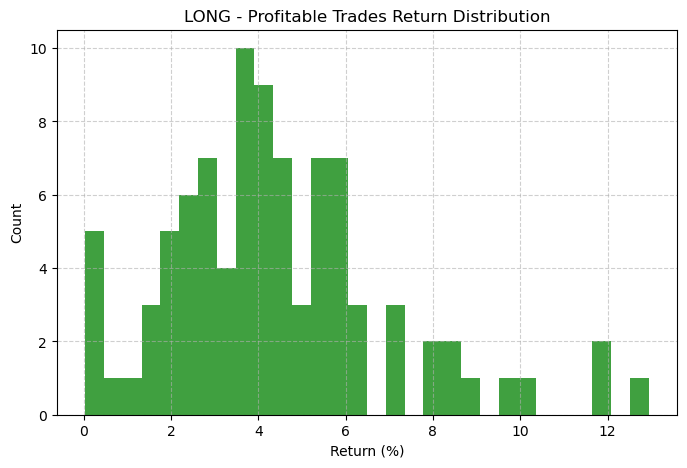

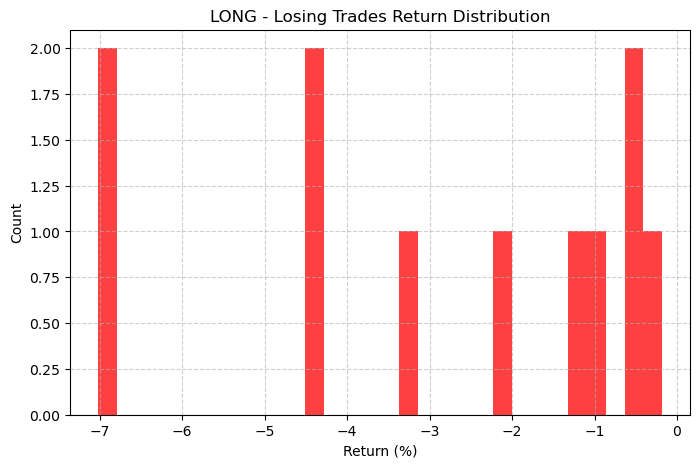

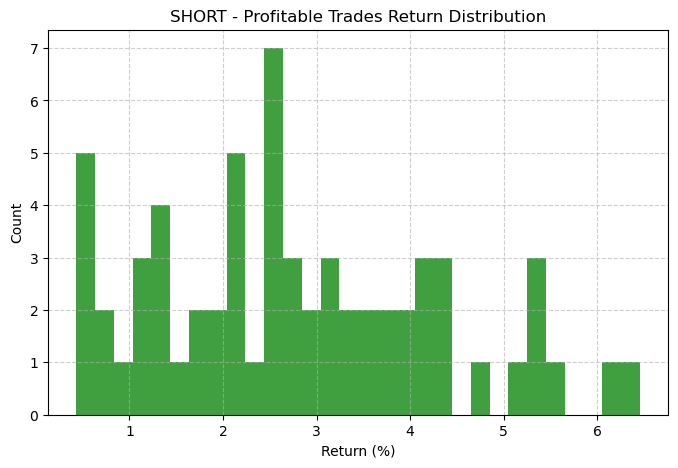

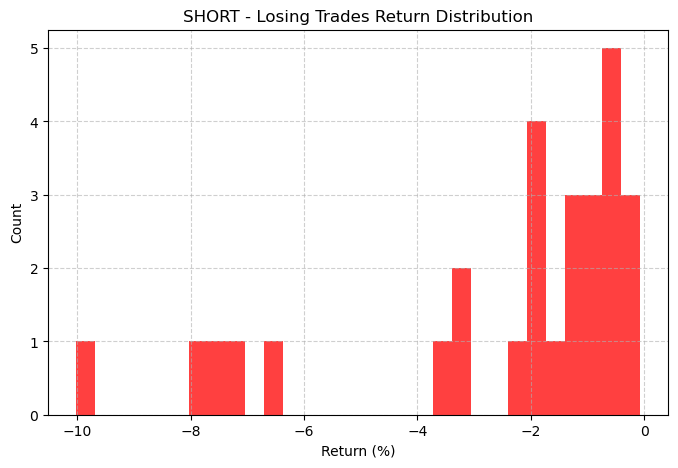

In [74]:
import matplotlib.pyplot as plt

# 确保 trades_df 存在
assert 'side' in trades_df.columns and 'return' in trades_df.columns, "trades_df 缺少 side 或 return 列"

# ========== 1) 拆分数据 ==========
long_trades = trades_df[trades_df['side'] == 'LONG']
short_trades = trades_df[trades_df['side'] == 'SHORT']

# 盈利和亏损
long_profit = long_trades[long_trades['return'] > 0]
long_loss   = long_trades[long_trades['return'] < 0]

short_profit = short_trades[short_trades['return'] > 0]
short_loss   = short_trades[short_trades['return'] < 0]

# ========== 2) 绘制四个独立分布图 ==========
def plot_distribution(data, title, color):
    plt.figure(figsize=(8,5))
    plt.hist(data['return']*100, bins=30, color=color, alpha=0.75)
    plt.xlabel('Return (%)')
    plt.ylabel('Count')
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# LONG
plot_distribution(long_profit, "LONG - Profitable Trades Return Distribution", "green")
plot_distribution(long_loss,   "LONG - Losing Trades Return Distribution", "red")

# SHORT
plot_distribution(short_profit, "SHORT - Profitable Trades Return Distribution", "green")
plot_distribution(short_loss,   "SHORT - Losing Trades Return Distribution", "red")


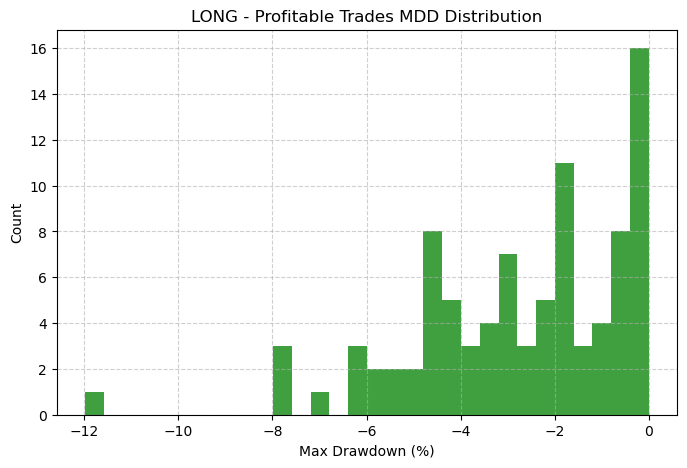

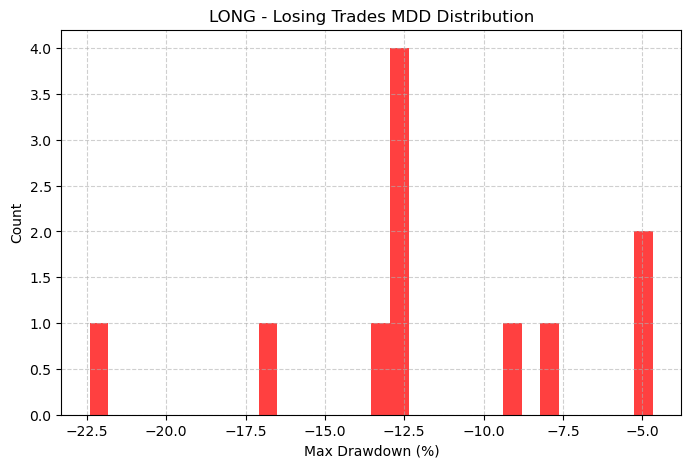

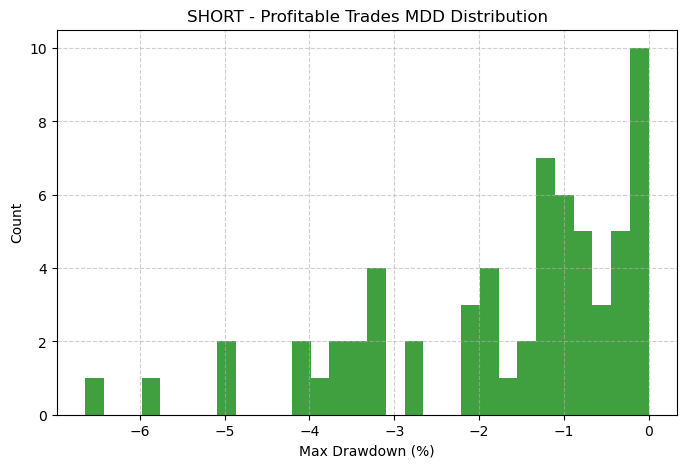

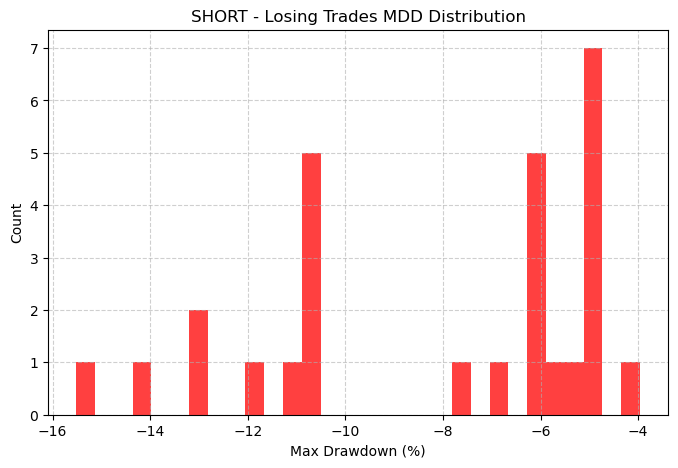

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# 确保 trades_df 存在，且包含 entry/exit 日期与价格
assert {'entry_date','exit_date','side','entry_px','exit_px'}.issubset(trades_df.columns), "trades_df 缺少必要列"

# 辅助函数：计算单笔交易的最大回撤
def calculate_trade_mdd(entry_date, exit_date, side):
    # 筛选该笔交易期间的价格
    trade_period = df[(df['date'] >= entry_date) & (df['date'] <= exit_date)].copy()
    prices = trade_period['Close'].values
    
    if len(prices) == 0:
        return np.nan
    
    if side == 'LONG':
        # 多头：价格下跌计算回撤
        running_max = np.maximum.accumulate(prices)
        drawdowns = (prices - running_max) / running_max
        return drawdowns.min()  # 最小值为最大回撤（负数）
    
    elif side == 'SHORT':
        # 空头：价格上涨视为回撤，需要反转
        running_min = np.minimum.accumulate(prices)
        drawdowns = (running_min - prices) / running_min
        return drawdowns.min()  # 最小值为最大回撤（负数）

    return np.nan

# 计算每笔交易的最大回撤
trades_df['max_drawdown'] = trades_df.apply(
    lambda row: calculate_trade_mdd(row['entry_date'], row['exit_date'], row['side']),
    axis=1
)

# 分组数据
long_profit = trades_df[(trades_df['side'] == 'LONG')  & (trades_df['return'] > 0)]
long_loss   = trades_df[(trades_df['side'] == 'LONG')  & (trades_df['return'] <= 0)]
short_profit= trades_df[(trades_df['side'] == 'SHORT') & (trades_df['return'] > 0)]
short_loss  = trades_df[(trades_df['side'] == 'SHORT') & (trades_df['return'] <= 0)]

# 统一函数画直方图
def plot_mdd_distribution(data, title, color):
    if len(data) == 0:
        print(f"{title}: 无数据")
        return
    plt.figure(figsize=(8,5))
    plt.hist(data['max_drawdown']*100, bins=30, color=color, alpha=0.75)
    plt.xlabel('Max Drawdown (%)')
    plt.ylabel('Count')
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# 绘制四个分布
plot_mdd_distribution(long_profit, "LONG - Profitable Trades MDD Distribution", "green")
plot_mdd_distribution(long_loss,   "LONG - Losing Trades MDD Distribution", "red")
plot_mdd_distribution(short_profit,"SHORT - Profitable Trades MDD Distribution", "green")
plot_mdd_distribution(short_loss,  "SHORT - Losing Trades MDD Distribution", "red")


### Strategy with 2.5 signal and stop loss of 10%

=== Strategy Performance (10% Stop, Gap-aware, EMA Intrabar Exit) ===
Period                 : 2010-01-06 ~ 2025-08-26 (15.64 yrs)
Initial Capital        : $100,000
Total Return           : 39.03%
CAGR                   : 2.13%
Annualized Volatility  : 2.19%
Sharpe Ratio           : 0.939
Sortino Ratio          : 0.281
Max Drawdown (MDD)     : -3.29%
Calmar Ratio           : 0.648
Trades                 : 193
Win Rate               : 78.76%
Average Trade Return   : 2.022% (median 2.688%)
Average Bars Held      : 9.10
Profit Factor          : 3.168
Expectancy per Trade   : 2.022%

By Side:
       trades  win_rate  avg_ret     pnl_usd
side                                        
LONG      102   87.2549   0.0294  30017.5843
SHORT      91   69.2308   0.0099   9010.6706

Yearly Returns (%):
2011    5.01
2012    1.33
2013    0.00
2014    0.51
2015    1.89
2016    1.35
2017    0.00
2018    1.48
2019    2.70
2020    4.98
2021    0.59
2022    8.08
2023    0.83
2024    2.22
2025    1.45
dtype: f

C:\Users\Yi\AppData\Local\Temp\ipykernel_35128\480822197.py:196: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_ret = equity_curve.resample('Y').last().pct_change().dropna()


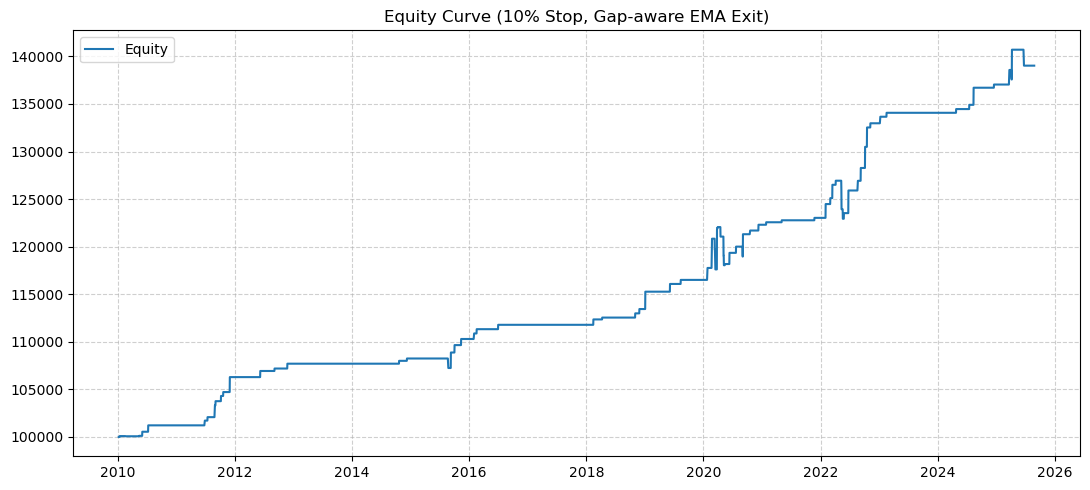

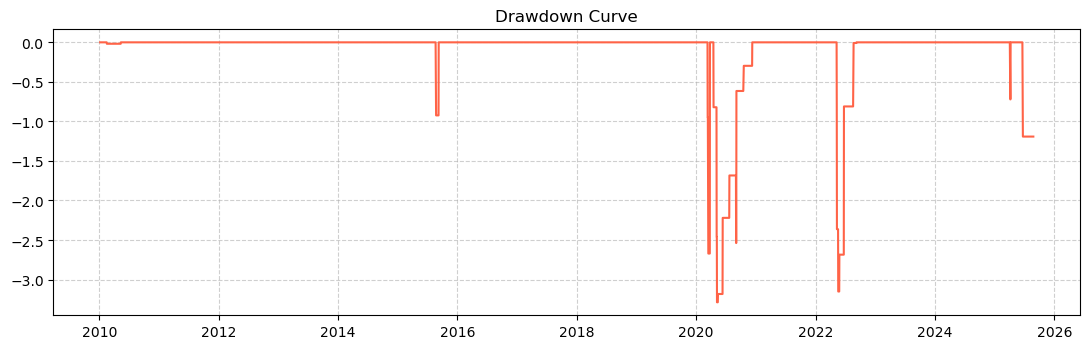

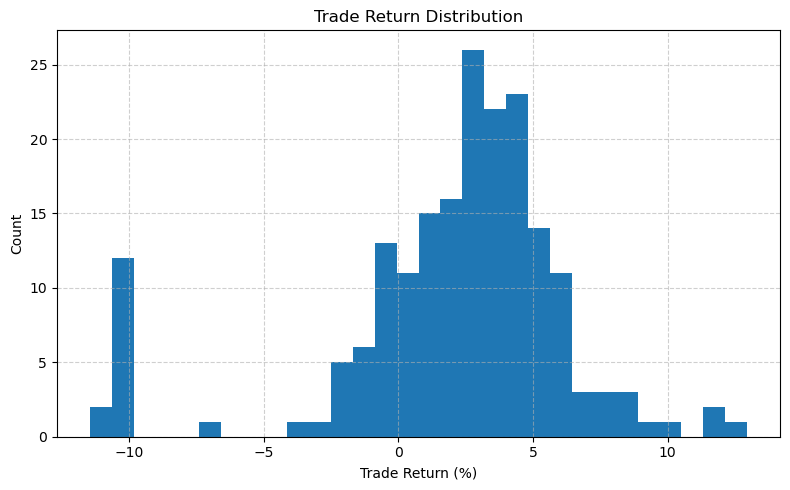

c:\Users\Yi\anaconda3\Lib\site-packages\itables\typing.py:203: SyntaxWarning: These arguments are not documented in ITableOptions: {'dom'}. You can silence this warning by setting `itables.options.warn_on_undocumented_option=False`. If you believe ITableOptions should be updated, please make a PR or open an issue at https://github.com/mwouts/itables
  warnings.warn(
c:\Users\Yi\anaconda3\Lib\site-packages\itables\typing.py:203: SyntaxWarning: These arguments are not documented in DTForITablesOptions: {'dom'}. You can silence this warning by setting `itables.options.warn_on_undocumented_option=False`. If you believe ITableOptions should be updated, please make a PR or open an issue at https://github.com/mwouts/itables
  warnings.warn(


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========== 0) 数据准备 ==========
def ensure_merged_df():
    """
    若你已在环境中准备了 merged_df（含 date, O/H/L/C, EMA20, SIGNAL），这里会直接使用；
    否则自动下载 QQQ 作为示例，并构造一个 SIGNAL 列以便跑通示例。
    """
    global merged_df
    try:
        assert isinstance(merged_df, pd.DataFrame)
        return merged_df.copy()
    except Exception:
        import yfinance as yf
        px = yf.download("QQQ", start="2010-01-06", end="2025-08-27")
        px = px.rename_axis('date').reset_index()
        px['EMA20'] = px['Close'].ewm(span=20, adjust=False).mean()
        # 演示 SIGNAL（实际请用你的）
        rng = np.random.default_rng(0)
        raw = rng.normal(0, 1, size=len(px))
        raw[(np.arange(len(px)) % 37) == 0] = -3.0  # BUY
        raw[(np.arange(len(px)) % 61) == 0] =  3.2  # SELL
        px['SIGNAL'] = raw
        return px

df = ensure_merged_df().copy()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

need_cols = {'date','Open','High','Low','Close','EMA20','SIGNAL'}
missing = need_cols - set(df.columns)
if missing:
    raise ValueError(f"缺少必要列: {missing}")

# ========== 1) 新信号：上界 2.5，下界 -2 ==========
#   SIGNAL < -2   -> BUY(+1)
#   SIGNAL > 2.5  -> SELL(-1)
df['signal_new'] = np.where(df['SIGNAL'] < -2, 1, np.where(df['SIGNAL'] > 2.5, -1, 0))

# ========== 2) 入场（允许并发，入场价=当日收盘）==========
buy_entries  = df.index[(df['signal_new'] == 1)  & (df['Close'] < df['EMA20'])].to_list()
sell_entries = df.index[(df['signal_new'] == -1) & (df['Close'] > df['EMA20'])].to_list()

NOTIONAL = 10_000.0
STOP_PCT = 0.10  # 10% 止损（多空一致）

# ========== 3) 出场函数（含“隔夜跳空跨止损/EMA”的修复）==========
def find_exit_with_stop_and_gaps(entry_idx: int, side: int):
    """
    出场优先级（每日检查）：
      1) gap_stop_exit: 开盘已跨越止损 -> 按 Open 出
      2) gap_open_exit: 开盘已跨越昨日 EMA -> 按 Open 出
      3) stop_intrabar: 当日 [Low,High] 触及止损价 -> 按止损价出
      4) cross_intrabar: 当日 [Low,High] 包含 EMA_t -> 按 EMA_t 出
      5) last_close: 样本结束仍未触发 -> 最后收盘出
    说明：
      - 止损价基于入场价固定：LONG=entry*(1-STOP_PCT)；SHORT=entry*(1+STOP_PCT)
      - gap_open 的 EMA 使用“昨日 EMA”（避免前视）
    """
    entry_px = float(df.loc[entry_idx, 'Close'])
    stop_price = entry_px * (1 - STOP_PCT) if side == 1 else entry_px * (1 + STOP_PCT)

    for i in range(entry_idx + 1, len(df)):
        o_i   = float(df.loc[i, 'Open'])
        low_i = float(df.loc[i, 'Low'])
        high_i= float(df.loc[i, 'High'])
        ema_im1 = float(df.loc[i-1, 'EMA20'])  # 昨日 EMA
        ema_i   = float(df.loc[i,   'EMA20'])  # 当日 EMA（仅盘中判断用）

        # 1) 隔夜跳空跨止损：按开盘价出（现实：无法获得理想止损价）
        if side == 1:
            if o_i <= stop_price:  # 多头：开盘价已低于/等于止损价
                return i, o_i, 'gap_stop_exit'
        else:
            if o_i >= stop_price:  # 空头：开盘价已高于/等于止损价
                return i, o_i, 'gap_stop_exit'

        # 2) 隔夜跳空跨 EMA（相对昨日 EMA）：按开盘价出
        if side == 1:
            if o_i >= ema_im1:     # 多头：开盘已在/上于昨EMA -> 视为越线
                return i, o_i, 'gap_open_exit'
        else:
            if o_i <= ema_im1:     # 空头：开盘已在/下于昨EMA -> 视为越线
                return i, o_i, 'gap_open_exit'

        # 3) 盘中触及止损（止损价落在当日区间内）：按止损价出
        if low_i <= stop_price <= high_i:
            return i, float(stop_price), 'stop_intrabar'

        # 4) 盘中触及 EMA（EMA_t 落在当日区间内）：按 EMA_t 出
        if low_i <= ema_i <= high_i:
            return i, float(ema_i), 'cross_intrabar'

    # 5) 到尾部仍未触发：最后收盘平
    last_idx = len(df) - 1
    return last_idx, float(df.loc[last_idx, 'Close']), 'last_close'

def per_trade_metrics(entry_idx: int, side: int, exit_idx: int, exit_px: float, reason: str):
    entry_px   = float(df.loc[entry_idx, 'Close'])
    entry_date = pd.to_datetime(df.loc[entry_idx, 'date'])
    exit_date  = pd.to_datetime(df.loc[exit_idx,  'date'])
    bars_held  = int(exit_idx - entry_idx)
    cal_days   = int((exit_date - entry_date).days)

    if side == 1:
        ret = (exit_px - entry_px) / entry_px
    else:
        ret = (entry_px - exit_px) / entry_px

    ann_ret = np.nan
    if bars_held > 0 and np.isfinite(ret):
        ann_ret = (1.0 + ret) ** (252.0 / bars_held) - 1.0

    return {
        'side': 'LONG' if side == 1 else 'SHORT',
        'entry_date': entry_date,
        'exit_date': exit_date,
        'bars_held': bars_held,
        'calendar_days': cal_days,
        'entry_px': entry_px,
        'exit_px': float(exit_px),
        'exit_reason': reason,
        'return': ret,
        'annualized_return': ann_ret,
        'pnl_usd': ret * NOTIONAL
    }

# ========== 4) 生成交易 ==========
records = []
for idx in buy_entries:
    e_idx, e_px, rsn = find_exit_with_stop_and_gaps(idx, side=+1)
    records.append(per_trade_metrics(idx, +1, e_idx, e_px, rsn))
for idx in sell_entries:
    e_idx, e_px, rsn = find_exit_with_stop_and_gaps(idx, side=-1)
    records.append(per_trade_metrics(idx, -1, e_idx, e_px, rsn))

trades_df = pd.DataFrame(records).sort_values(['entry_date','side']).reset_index(drop=True)

# ========== 5) 构建资金曲线（出场日入账） & 日收益 ==========
initial_capital = 100_000.0
date_range = pd.date_range(df['date'].min(), df['date'].max(), freq='B')
daily_pnl = trades_df.groupby('exit_date')['pnl_usd'].sum()
equity_curve = pd.Series(0.0, index=date_range)
equity_curve.update(daily_pnl)
equity_curve = initial_capital + equity_curve.cumsum()
daily_ret = equity_curve.pct_change().fillna(0.0)

# ========== 6) Performance Metrics ==========
def max_drawdown(series: pd.Series):
    roll_max = series.cummax()
    dd = (series - roll_max) / roll_max
    return dd.min(), dd

def sharpe_ratio(daily_ret, rf=0.0):
    mu, sigma = daily_ret.mean(), daily_ret.std()
    if sigma == 0 or np.isnan(sigma): return np.nan
    return (mu - rf/252) * np.sqrt(252) / sigma

def sortino_ratio(daily_ret, rf=0.0):
    downside = daily_ret[daily_ret < 0]
    ds = downside.std()
    mu = daily_ret.mean()
    if ds == 0 or np.isnan(ds): return np.nan
    return (mu - rf/252) * np.sqrt(252) / ds

total_return = equity_curve.iloc[-1] / equity_curve.iloc[0] - 1.0
years = (equity_curve.index[-1] - equity_curve.index[0]).days / 365.25
cagr = (1.0 + total_return) ** (1/years) - 1.0 if years > 0 else np.nan
ann_vol = daily_ret.std() * np.sqrt(252)
sr = sharpe_ratio(daily_ret)
so = sortino_ratio(daily_ret)
mdd, dd_series = max_drawdown(equity_curve)
calmar = (cagr / abs(mdd)) if mdd < 0 else np.nan

n_trades = len(trades_df)
win_rate = (trades_df['return'] > 0).mean() if n_trades else np.nan
avg_ret = trades_df['return'].mean() if n_trades else np.nan
med_ret = trades_df['return'].median() if n_trades else np.nan
avg_bars = trades_df['bars_held'].mean() if n_trades else np.nan
gross_profit = trades_df.loc[trades_df['pnl_usd'] > 0, 'pnl_usd'].sum()
gross_loss   = trades_df.loc[trades_df['pnl_usd'] < 0, 'pnl_usd'].sum()
profit_factor = (gross_profit / abs(gross_loss)) if gross_loss != 0 else np.inf
avg_win = trades_df.loc[trades_df['return'] > 0, 'return'].mean()
avg_loss = trades_df.loc[trades_df['return'] < 0, 'return'].mean()
expectancy = (win_rate * avg_win + (1 - win_rate) * (avg_loss if not np.isnan(avg_loss) else 0)) if n_trades else np.nan

summary_side = trades_df.groupby('side').agg(
    trades=('return','count'),
    win_rate=('return', lambda s: (s>0).mean()),
    avg_ret=('return','mean'),
    pnl_usd=('pnl_usd','sum')
)

yearly_ret = equity_curve.resample('Y').last().pct_change().dropna()
yearly_ret.index = yearly_ret.index.year

print("=== Strategy Performance (10% Stop, Gap-aware, EMA Intrabar Exit) ===")
print(f"Period                 : {equity_curve.index[0].date()} ~ {equity_curve.index[-1].date()} ({years:.2f} yrs)")
print(f"Initial Capital        : ${initial_capital:,.0f}")
print(f"Total Return           : {total_return*100:.2f}%")
print(f"CAGR                   : {cagr*100:.2f}%")
print(f"Annualized Volatility  : {ann_vol*100:.2f}%")
print(f"Sharpe Ratio           : {sr:.3f}")
print(f"Sortino Ratio          : {so:.3f}")
print(f"Max Drawdown (MDD)     : {mdd*100:.2f}%")
print(f"Calmar Ratio           : {calmar:.3f}")
print(f"Trades                 : {n_trades}")
print(f"Win Rate               : {win_rate*100:.2f}%")
print(f"Average Trade Return   : {avg_ret*100:.3f}% (median {med_ret*100:.3f}%)")
print(f"Average Bars Held      : {avg_bars:.2f}")
print(f"Profit Factor          : {profit_factor:.3f}")
print(f"Expectancy per Trade   : {expectancy*100:.3f}%")

print("\nBy Side:")
print(summary_side.assign(win_rate=lambda d:(d['win_rate']*100)).round(4))

print("\nYearly Returns (%):")
print((yearly_ret*100).round(2))

# ========== 7) 可选：图表（权益、回撤、交易收益分布）==========
plt.figure(figsize=(11,5))
plt.plot(equity_curve.index, equity_curve.values, label='Equity')
plt.title('Equity Curve (10% Stop, Gap-aware EMA Exit)')
plt.grid(True, linestyle='--', alpha=0.6); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(11,3.6))
plt.plot(dd_series.index, dd_series.values*100, color='tomato', label='Drawdown (%)')
plt.title('Drawdown Curve'); plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,5))
plt.hist(trades_df['return']*100, bins=30)
plt.xlabel('Trade Return (%)'); plt.ylabel('Count')
plt.title('Trade Return Distribution'); plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(); plt.show()

# ========== 8) 交互式交易明细 ==========
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)
cols = ['side','entry_date','exit_date','bars_held','calendar_days',
        'entry_px','exit_px','exit_reason','return','annualized_return','pnl_usd']
show(trades_df[cols], dom='Bfrtip', buttons=["copy","csv","excel"], paging=True, scrollX=True)


### 50-30-20-adding with upper 2.5, lower 2.0, no stop loss

=== Performance (Layered 50/30/20, add on >=2% move + signal, No Stop, EMA Exit) ===
Period                 : 2010-01-06 ~ 2025-08-26 (15.64 yrs)
Initial Capital        : $100,000
Total Return           : 8.06%
CAGR                   : 0.50%
Annualized Volatility  : 0.45%
Sharpe Ratio           : 1.073
Sortino Ratio          : 0.116
Max Drawdown (MDD)     : -0.92%
Calmar Ratio           : 0.543
Trades                 : 63
Win Rate               : 87.30%
Average Trade Return   : 2.342% (median 2.617%)
Average Bars Held      : 9.90
Profit Factor          : 4.764
Expectancy per Trade   : 2.342%

By Side:
       trades  win_rate  avg_ret    pnl_usd  avg_layers  avg_invested
side                                                                 
LONG       38   92.1053   0.0302  6899.7417      1.5526     6552.6316
SHORT      25   80.0000   0.0132  1158.5055      1.5600     6480.0000

Yearly Returns (%):
2011    1.30
2012    0.27
2013    0.00
2014    0.27
2015    0.63
2016    0.49
2017    0.00

C:\Users\Yi\AppData\Local\Temp\ipykernel_35128\1502174080.py:233: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_ret = equity_curve.resample('Y').last().pct_change().dropna()


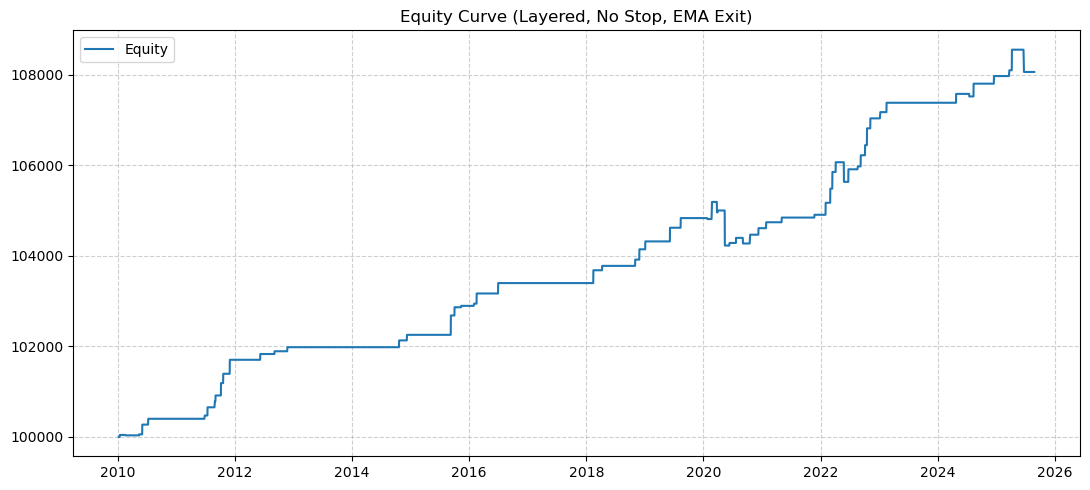

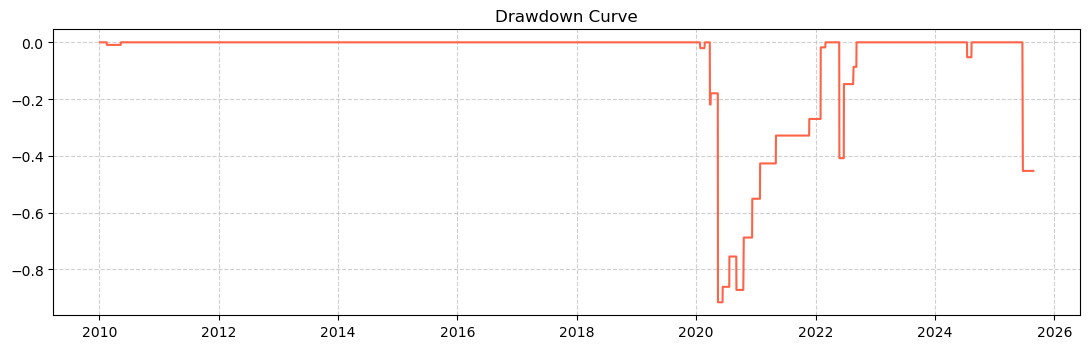

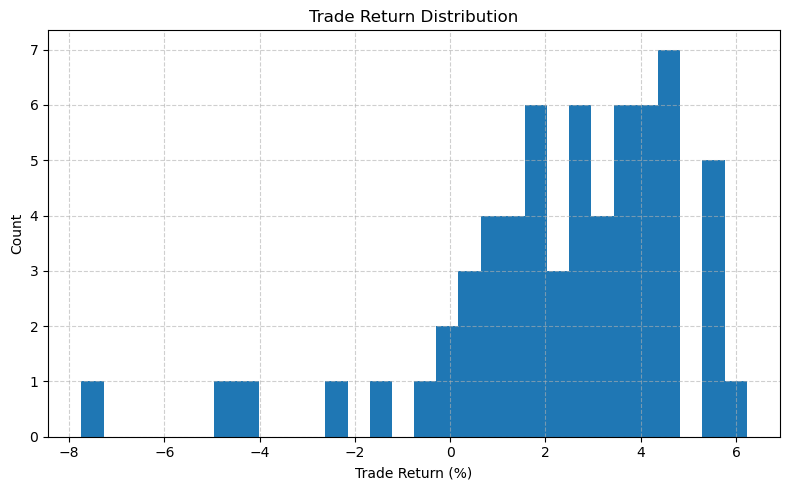

c:\Users\Yi\anaconda3\Lib\site-packages\itables\typing.py:203: SyntaxWarning: These arguments are not documented in ITableOptions: {'dom'}. You can silence this warning by setting `itables.options.warn_on_undocumented_option=False`. If you believe ITableOptions should be updated, please make a PR or open an issue at https://github.com/mwouts/itables
  warnings.warn(
c:\Users\Yi\anaconda3\Lib\site-packages\itables\typing.py:203: SyntaxWarning: These arguments are not documented in DTForITablesOptions: {'dom'}. You can silence this warning by setting `itables.options.warn_on_undocumented_option=False`. If you believe ITableOptions should be updated, please make a PR or open an issue at https://github.com/mwouts/itables
  warnings.warn(


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========== 0) 数据准备 ==========
def ensure_df():
    """
    如果你已经在环境里有 merged_df（含 date, O/H/L/C, EMA20, SIGNAL），会直接用；
    否则下载 QQQ 并生成示例 SIGNAL。
    """
    global merged_df
    try:
        assert isinstance(merged_df, pd.DataFrame)
        df0 = merged_df.copy()
    except Exception:
        import yfinance as yf
        df0 = yf.download("QQQ", start="2010-01-06", end="2025-08-27")
        df0 = df0.rename_axis('date').reset_index()
        # 示例: 生成 EMA20 与 SIGNAL（实盘请替换为你的 SIGNAL）
        df0['EMA20'] = df0['Close'].ewm(span=20, adjust=False).mean()
        rng = np.random.default_rng(0)
        raw = rng.normal(0, 1, size=len(df0))
        raw[(np.arange(len(df0)) % 37) == 0] = -3.0  # 强制 BUY
        raw[(np.arange(len(df0)) % 61) == 0] =  3.2  # 强制 SELL
        df0['SIGNAL'] = raw
    return df0

df = ensure_df().copy()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

need = {'date','Open','High','Low','Close','EMA20','SIGNAL'}
missing = need - set(df.columns)
if missing:
    raise ValueError(f"缺少必要列: {missing}")

# ========== 1) 新信号：SELL 上界 2.5，下界 BUY -2 ==========
#   SIGNAL < -2   -> BUY(+1)
#   SIGNAL > 2.5  -> SELL(-1)
df['signal_new'] = np.where(df['SIGNAL'] < -2, 1, np.where(df['SIGNAL'] > 2.5, -1, 0))

# ========== 2) 参数（分层加仓，无止损）==========
LAYERS = [0.5, 0.3, 0.2]        # 50% -> 30% -> 20%
THRESH = 0.02                   # 加仓阈值：相对上次加仓价变动 >= 2%
BASE_CAP = 10_000.0            # 以每笔“满仓容量”1w 美元衡量（用于收益折算）
# 方向约定：+1 = LONG，-1 = SHORT
# 入场条件：LONG: signal=+1 且 Close<EMA20；SHORT: signal=-1 且 Close>EMA20
# 出场：gap-open跨昨日EMA -> 按开盘价；否则当日盘中包含当日EMA -> 按EMA；否则继续持有；样本尾强制收盘

# ========== 3) 回测引擎（单标的、单向同一时刻最多1笔，可分层加仓）==========
records = []

in_pos = False
side = 0            # +1 LONG, -1 SHORT
entry_idx = None
layers_used = 0
last_add_price = None
layer_details = []  # 保存 (price, notional) 逐层信息

dates = df['date'].values

def exit_trade(exit_idx, exit_price, reason):
    """结算当前持仓为一笔交易记录（多层按逐层实际入场价结算）。"""
    global in_pos, side, entry_idx, layers_used, last_add_price, layer_details

    entry_date = pd.to_datetime(df.loc[entry_idx, 'date'])
    exit_date  = pd.to_datetime(df.loc[exit_idx,  'date'])
    bars_held  = int(exit_idx - entry_idx)
    cal_days   = int((exit_date - entry_date).days)

    # 分层逐层计算 PnL
    pnl_usd = 0.0
    invested = 0.0
    for (px, notional) in layer_details:
        if side == 1:
            pnl_usd += (exit_price - px) / px * notional
        else:
            pnl_usd += (px - exit_price) / px * notional
        invested += notional

    # “交易回报”定义为 对本笔实际投入资金（各层之和）的收益率
    trade_return = pnl_usd / invested if invested > 0 else np.nan
    # 年化（按持仓交易日 bar 计）
    ann_ret = np.nan
    if bars_held > 0 and np.isfinite(trade_return):
        ann_ret = (1.0 + trade_return) ** (252.0 / bars_held) - 1.0

    records.append({
        'side': 'LONG' if side == 1 else 'SHORT',
        'entry_date': entry_date,
        'exit_date': exit_date,
        'bars_held': bars_held,
        'calendar_days': cal_days,
        'entry_px': layer_details[0][0],   # 第一层入场价（参考）
        'exit_px': float(exit_price),
        'exit_reason': reason,
        'layers_used': layers_used,
        'invested_usd': invested,
        'pnl_usd': pnl_usd,
        'return': trade_return,
        'annualized_return': ann_ret
    })

    # 重置持仓状态
    in_pos = False
    side = 0
    entry_idx = None
    layers_used = 0
    last_add_price = None
    layer_details = []

for i in range(len(df)):
    o = float(df.loc[i,'Open'])
    h = float(df.loc[i,'High'])
    l = float(df.loc[i,'Low'])
    c = float(df.loc[i,'Close'])
    ema = float(df.loc[i,'EMA20'])
    sig = int(df.loc[i,'signal_new'])

    if not in_pos:
        # 建仓：同向信号 + 价格相对 EMA 的方向性过滤
        if sig == 1 and c < ema:
            # 开多：第一层 50%
            in_pos = True
            side = +1
            entry_idx = i
            layers_used = 1
            last_add_price = c
            layer_details = [(c, BASE_CAP * LAYERS[0])]
        elif sig == -1 and c > ema:
            # 开空：第一层 50%
            in_pos = True
            side = -1
            entry_idx = i
            layers_used = 1
            last_add_price = c
            layer_details = [(c, BASE_CAP * LAYERS[0])]
        else:
            continue
    else:
        # 已持仓，从下一根K线起才能出场/加仓
        if i == entry_idx:
            continue

        ema_yday = float(df.loc[i-1,'EMA20'])  # 昨日 EMA（用于开盘跨越判断）

        # 1) gap-open 跨越昨日 EMA：开盘直接平
        if side == 1 and o >= ema_yday:
            exit_trade(i, o, 'gap_open_exit'); continue
        if side == -1 and o <= ema_yday:
            exit_trade(i, o, 'gap_open_exit'); continue

        # 2) 盘中触碰当日 EMA：按当日 EMA 平
        if l <= ema <= h:
            exit_trade(i, ema, 'cross_intrabar'); continue

        # 3) 尚未出场，尝试加仓（同向新信号 + 相对 last_add_price 变动 ≥ 2%）
        if layers_used < len(LAYERS):
            if side == 1 and sig == 1 and c < ema:  # 多头仍需位于 EMA 下方
                if c <= last_add_price * (1 - THRESH):
                    layers_used += 1
                    layer_details.append((c, BASE_CAP * LAYERS[layers_used-1]))
                    last_add_price = c
            elif side == -1 and sig == -1 and c > ema:  # 空头仍需位于 EMA 上方
                if c >= last_add_price * (1 + THRESH):
                    layers_used += 1
                    layer_details.append((c, BASE_CAP * LAYERS[layers_used-1]))
                    last_add_price = c

# 样本结束仍持仓 -> 最后一根收盘平
if in_pos:
    exit_trade(len(df)-1, float(df.loc[len(df)-1,'Close']), 'last_close')

trades_df = pd.DataFrame(records).sort_values(['entry_date','side']).reset_index(drop=True)

# ========== 4) 组合资金曲线（出场日入账） & Performance Metrics ==========
initial_capital = 100_000.0
date_range = pd.date_range(df['date'].min(), df['date'].max(), freq='B')

daily_pnl = trades_df.groupby('exit_date')['pnl_usd'].sum()
equity_curve = pd.Series(0.0, index=date_range, dtype=float)
equity_curve.update(daily_pnl)
equity_curve = initial_capital + equity_curve.cumsum()
daily_ret = equity_curve.pct_change().fillna(0.0)

def max_drawdown(series: pd.Series):
    roll_max = series.cummax()
    dd = (series - roll_max) / roll_max
    return dd.min(), dd

def sharpe_ratio(daily_ret, rf=0.0):
    mu, sigma = daily_ret.mean(), daily_ret.std()
    if sigma == 0 or np.isnan(sigma): return np.nan
    return (mu - rf/252) * np.sqrt(252) / sigma

def sortino_ratio(daily_ret, rf=0.0):
    downside = daily_ret[daily_ret < 0]
    ds = downside.std()
    mu = daily_ret.mean()
    if ds == 0 or np.isnan(ds): return np.nan
    return (mu - rf/252) * np.sqrt(252) / ds

total_return = equity_curve.iloc[-1]/equity_curve.iloc[0] - 1.0
years = (equity_curve.index[-1] - equity_curve.index[0]).days / 365.25
cagr = (1.0 + total_return) ** (1/years) - 1.0 if years>0 else np.nan
ann_vol = daily_ret.std() * np.sqrt(252)
sr = sharpe_ratio(daily_ret)
so = sortino_ratio(daily_ret)
mdd, dd_series = max_drawdown(equity_curve)
calmar = (cagr / abs(mdd)) if mdd < 0 else np.nan

n_trades = len(trades_df)
win_rate = (trades_df['pnl_usd'] > 0).mean() if n_trades else np.nan
avg_ret = trades_df['return'].mean() if n_trades else np.nan
med_ret = trades_df['return'].median() if n_trades else np.nan
avg_bars = trades_df['bars_held'].mean() if n_trades else np.nan
gross_profit = trades_df.loc[trades_df['pnl_usd'] > 0, 'pnl_usd'].sum()
gross_loss   = trades_df.loc[trades_df['pnl_usd'] < 0, 'pnl_usd'].sum()
profit_factor = (gross_profit / abs(gross_loss)) if gross_loss != 0 else np.inf
avg_win = trades_df.loc[trades_df['pnl_usd'] > 0, 'return'].mean()
avg_loss = trades_df.loc[trades_df['pnl_usd'] < 0, 'return'].mean()
expectancy = (win_rate * avg_win + (1 - win_rate) * (avg_loss if not np.isnan(avg_loss) else 0)) if n_trades else np.nan

summary_side = trades_df.groupby('side').agg(
    trades=('return','count'),
    win_rate=('pnl_usd', lambda s: (s>0).mean()),
    avg_ret=('return','mean'),
    pnl_usd=('pnl_usd','sum'),
    avg_layers=('layers_used','mean'),
    avg_invested=('invested_usd','mean')
)

yearly_ret = equity_curve.resample('Y').last().pct_change().dropna()
yearly_ret.index = yearly_ret.index.year

print("=== Performance (Layered 50/30/20, add on >=2% move + signal, No Stop, EMA Exit) ===")
print(f"Period                 : {equity_curve.index[0].date()} ~ {equity_curve.index[-1].date()} ({years:.2f} yrs)")
print(f"Initial Capital        : ${initial_capital:,.0f}")
print(f"Total Return           : {total_return*100:.2f}%")
print(f"CAGR                   : {cagr*100:.2f}%")
print(f"Annualized Volatility  : {ann_vol*100:.2f}%")
print(f"Sharpe Ratio           : {sr:.3f}")
print(f"Sortino Ratio          : {so:.3f}")
print(f"Max Drawdown (MDD)     : {mdd*100:.2f}%")
print(f"Calmar Ratio           : {calmar:.3f}")
print(f"Trades                 : {n_trades}")
print(f"Win Rate               : {win_rate*100:.2f}%")
print(f"Average Trade Return   : {avg_ret*100:.3f}% (median {med_ret*100:.3f}%)")
print(f"Average Bars Held      : {avg_bars:.2f}")
print(f"Profit Factor          : {profit_factor:.3f}")
print(f"Expectancy per Trade   : {expectancy*100:.3f}%")

print("\nBy Side:")
print(summary_side.assign(win_rate=lambda d:(d['win_rate']*100)).round(4))

print("\nYearly Returns (%):")
print((yearly_ret*100).round(2))

# ========== 5) 图表 ==========
plt.figure(figsize=(11,5))
plt.plot(equity_curve.index, equity_curve.values, label='Equity')
plt.title('Equity Curve (Layered, No Stop, EMA Exit)')
plt.grid(True, linestyle='--', alpha=0.6); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(11,3.6))
plt.plot(dd_series.index, dd_series.values*100, color='tomato', label='Drawdown (%)')
plt.title('Drawdown Curve'); plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,5))
plt.hist(trades_df['return']*100, bins=30)
plt.xlabel('Trade Return (%)'); plt.ylabel('Count')
plt.title('Trade Return Distribution'); plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(); plt.show()

# ========== 6) 交互式交易明细 ==========
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)
cols = ['side','entry_date','exit_date','bars_held','calendar_days',
        'entry_px','exit_px','exit_reason','layers_used','invested_usd',
        'pnl_usd','return','annualized_return']
show(trades_df[cols], dom='Bfrtip', buttons=["copy","csv","excel"], paging=True, scrollX=True)


In [78]:
print("\nYearly Returns (%):")
print((yearly_ret*100).round(2))


Yearly Returns (%):
2011    1.30
2012    0.27
2013    0.00
2014    0.27
2015    0.63
2016    0.49
2017    0.00
2018    0.72
2019    0.66
2020   -0.21
2021    0.28
2022    2.03
2023    0.32
2024    0.55
2025    0.08
dtype: float64
